<a href="https://colab.research.google.com/github/rHarris4080/thinkful_25.5_assignment/blob/main/25_5_Assignment_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#25.5 Assignment - Rob Harris
##DBSCAN 
###In this assignment, you'll continue working with the heart disease dataset from the UC Irvine Machine Learning Repository.

1. Apply DBSCAN to the heart disease dataset by trying different values for the eps and min_samples parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.
2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?
3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of eps. When you increase the value of eps, how does that affect the number of clusters that DBSCAN identifies? 


###Load libraries and establish connection:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

###Preprocessing:

In [ ]:
# Make sure the number of rows divides evenly into four samples.  Thx Ex.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace some random string values.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)


###Standardize features and run model:

In [ ]:
# Standarizing the features
X_std = StandardScaler().fit_transform(X)

###Visualize DBSCAN clustering:

In [ ]:
def visualize(clusters):
 pca = PCA(n_components=2).fit_transform(X_std)

 plt.figure(figsize=(10,5))
 colours = 'rbg'
 for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

 plt.xticks([])
 plt.yticks([])
 plt.axis('off')
 plt.show()

epsilon: 0.5 	minPts: 5 	Number clusters: 1


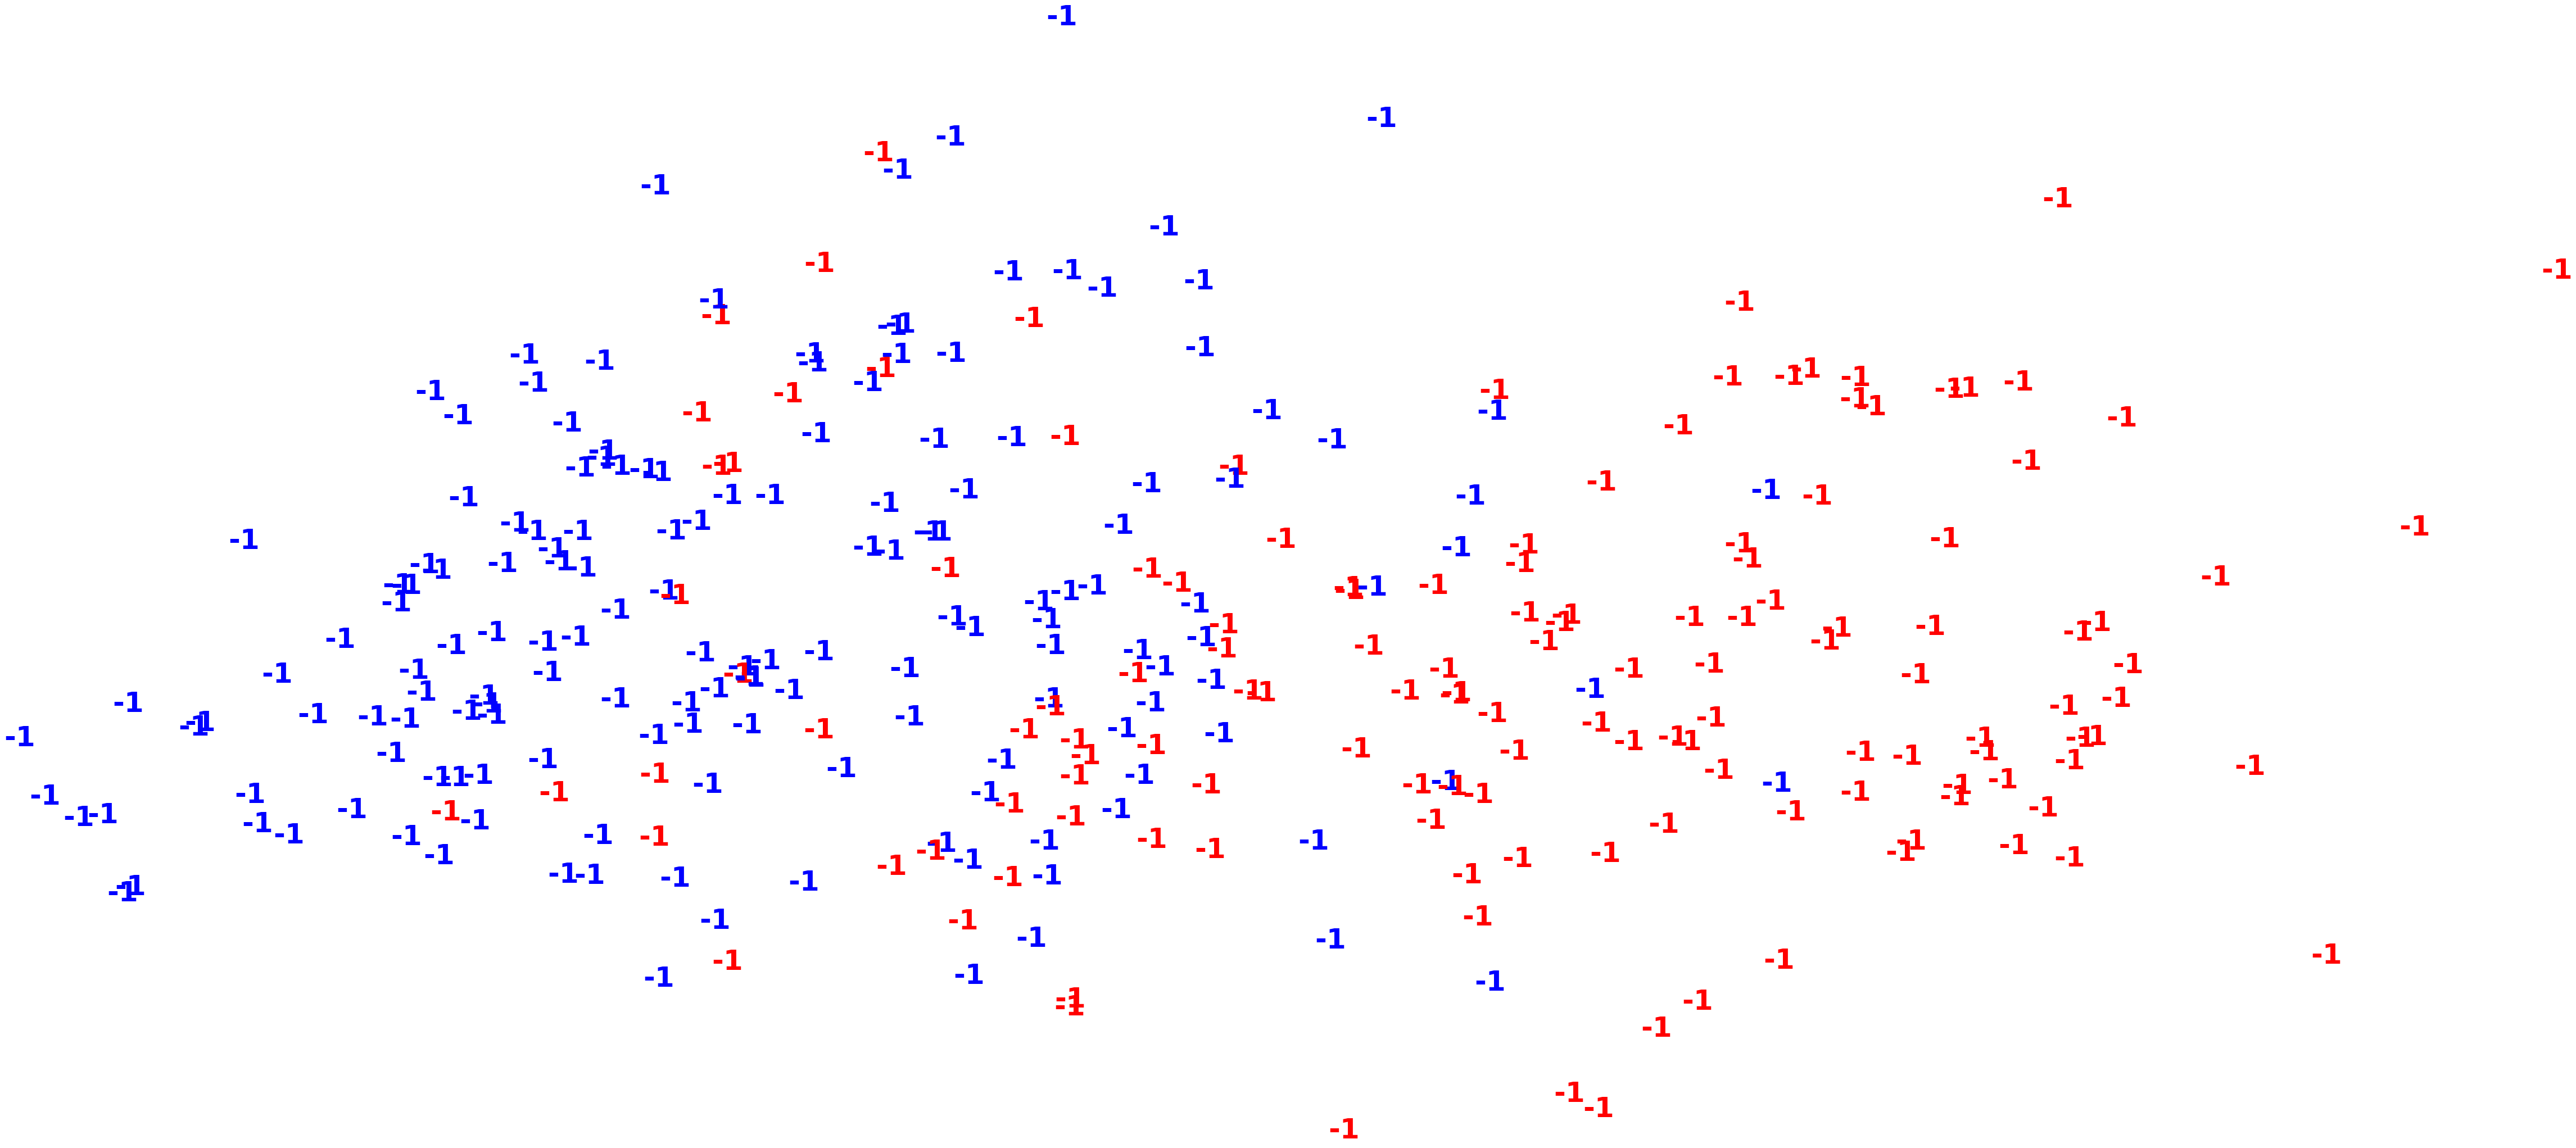

epsilon: 0.5 	minPts: 6 	Number clusters: 1


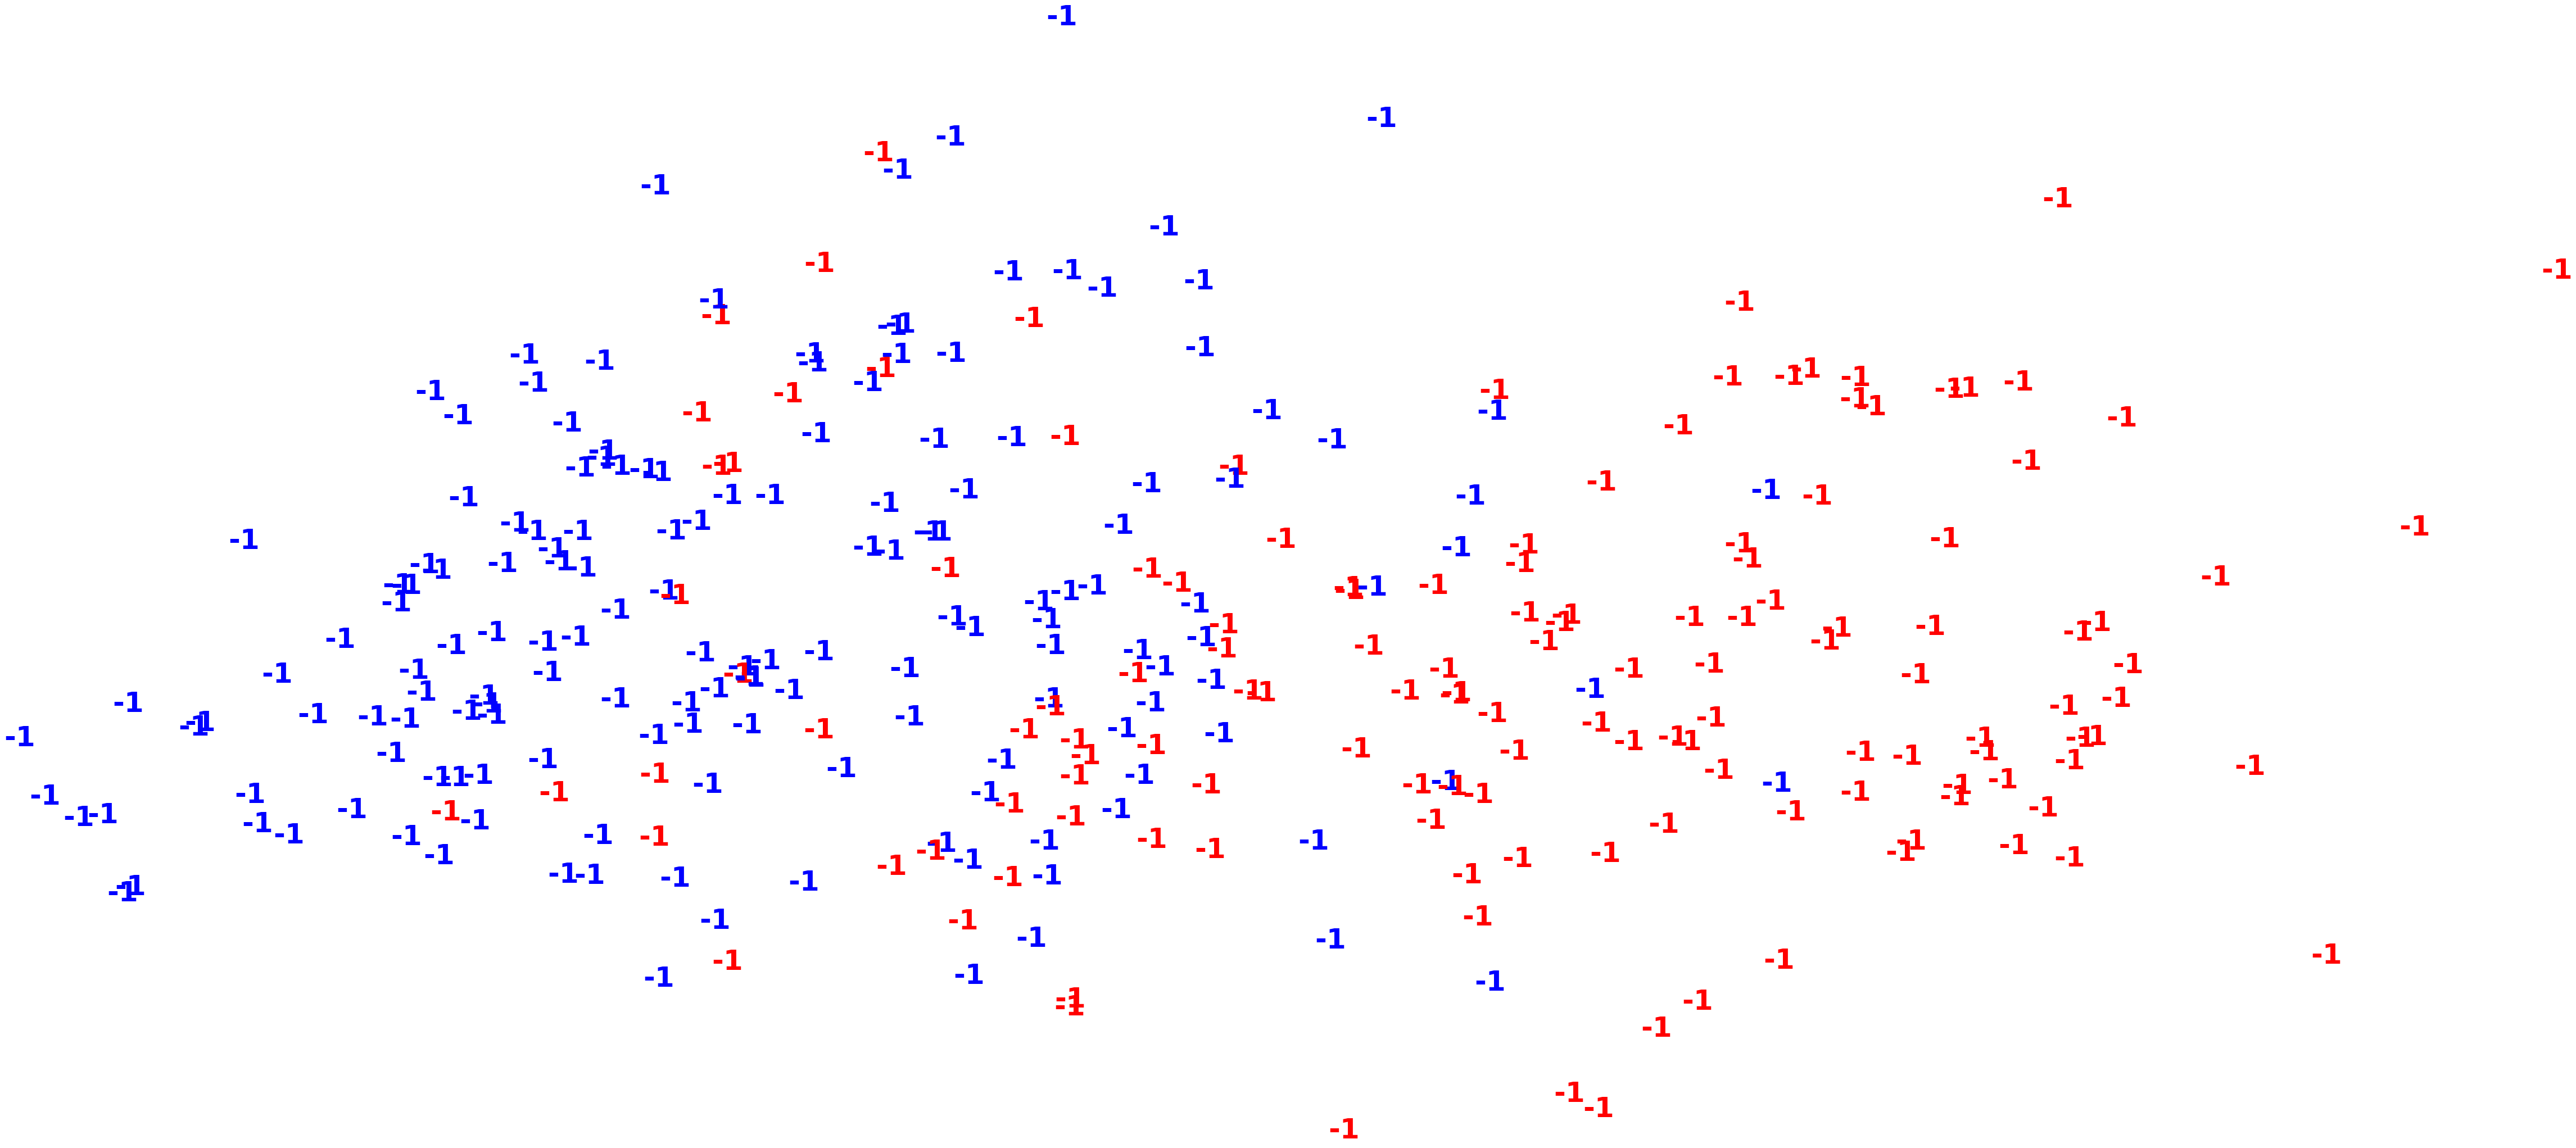

epsilon: 1 	minPts: 5 	Number clusters: 1


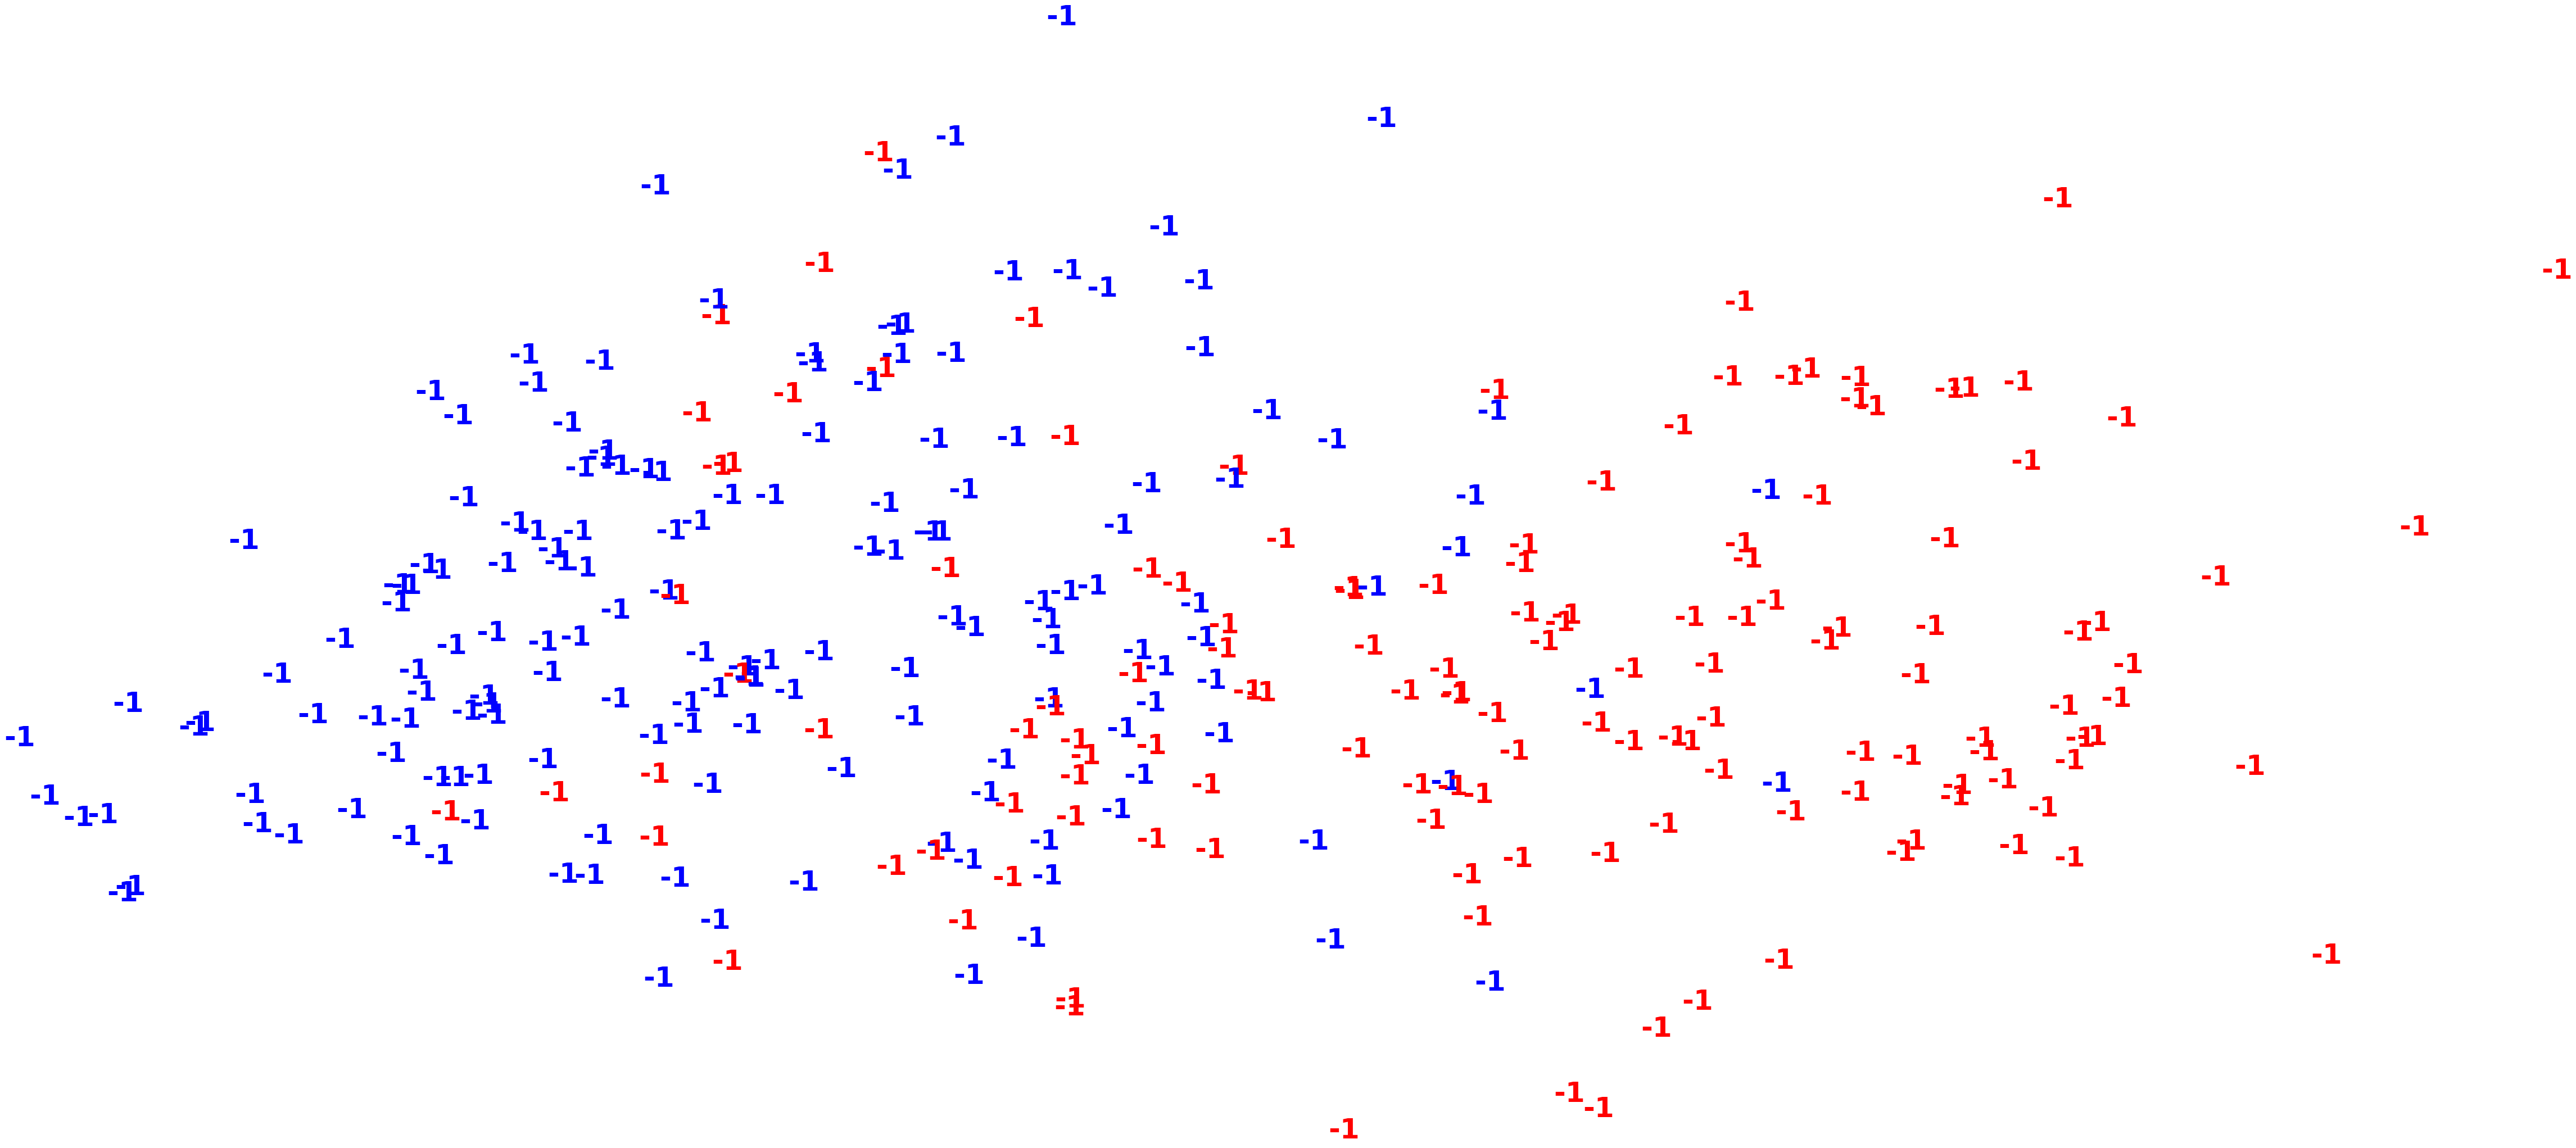

epsilon: 1 	minPts: 6 	Number clusters: 1


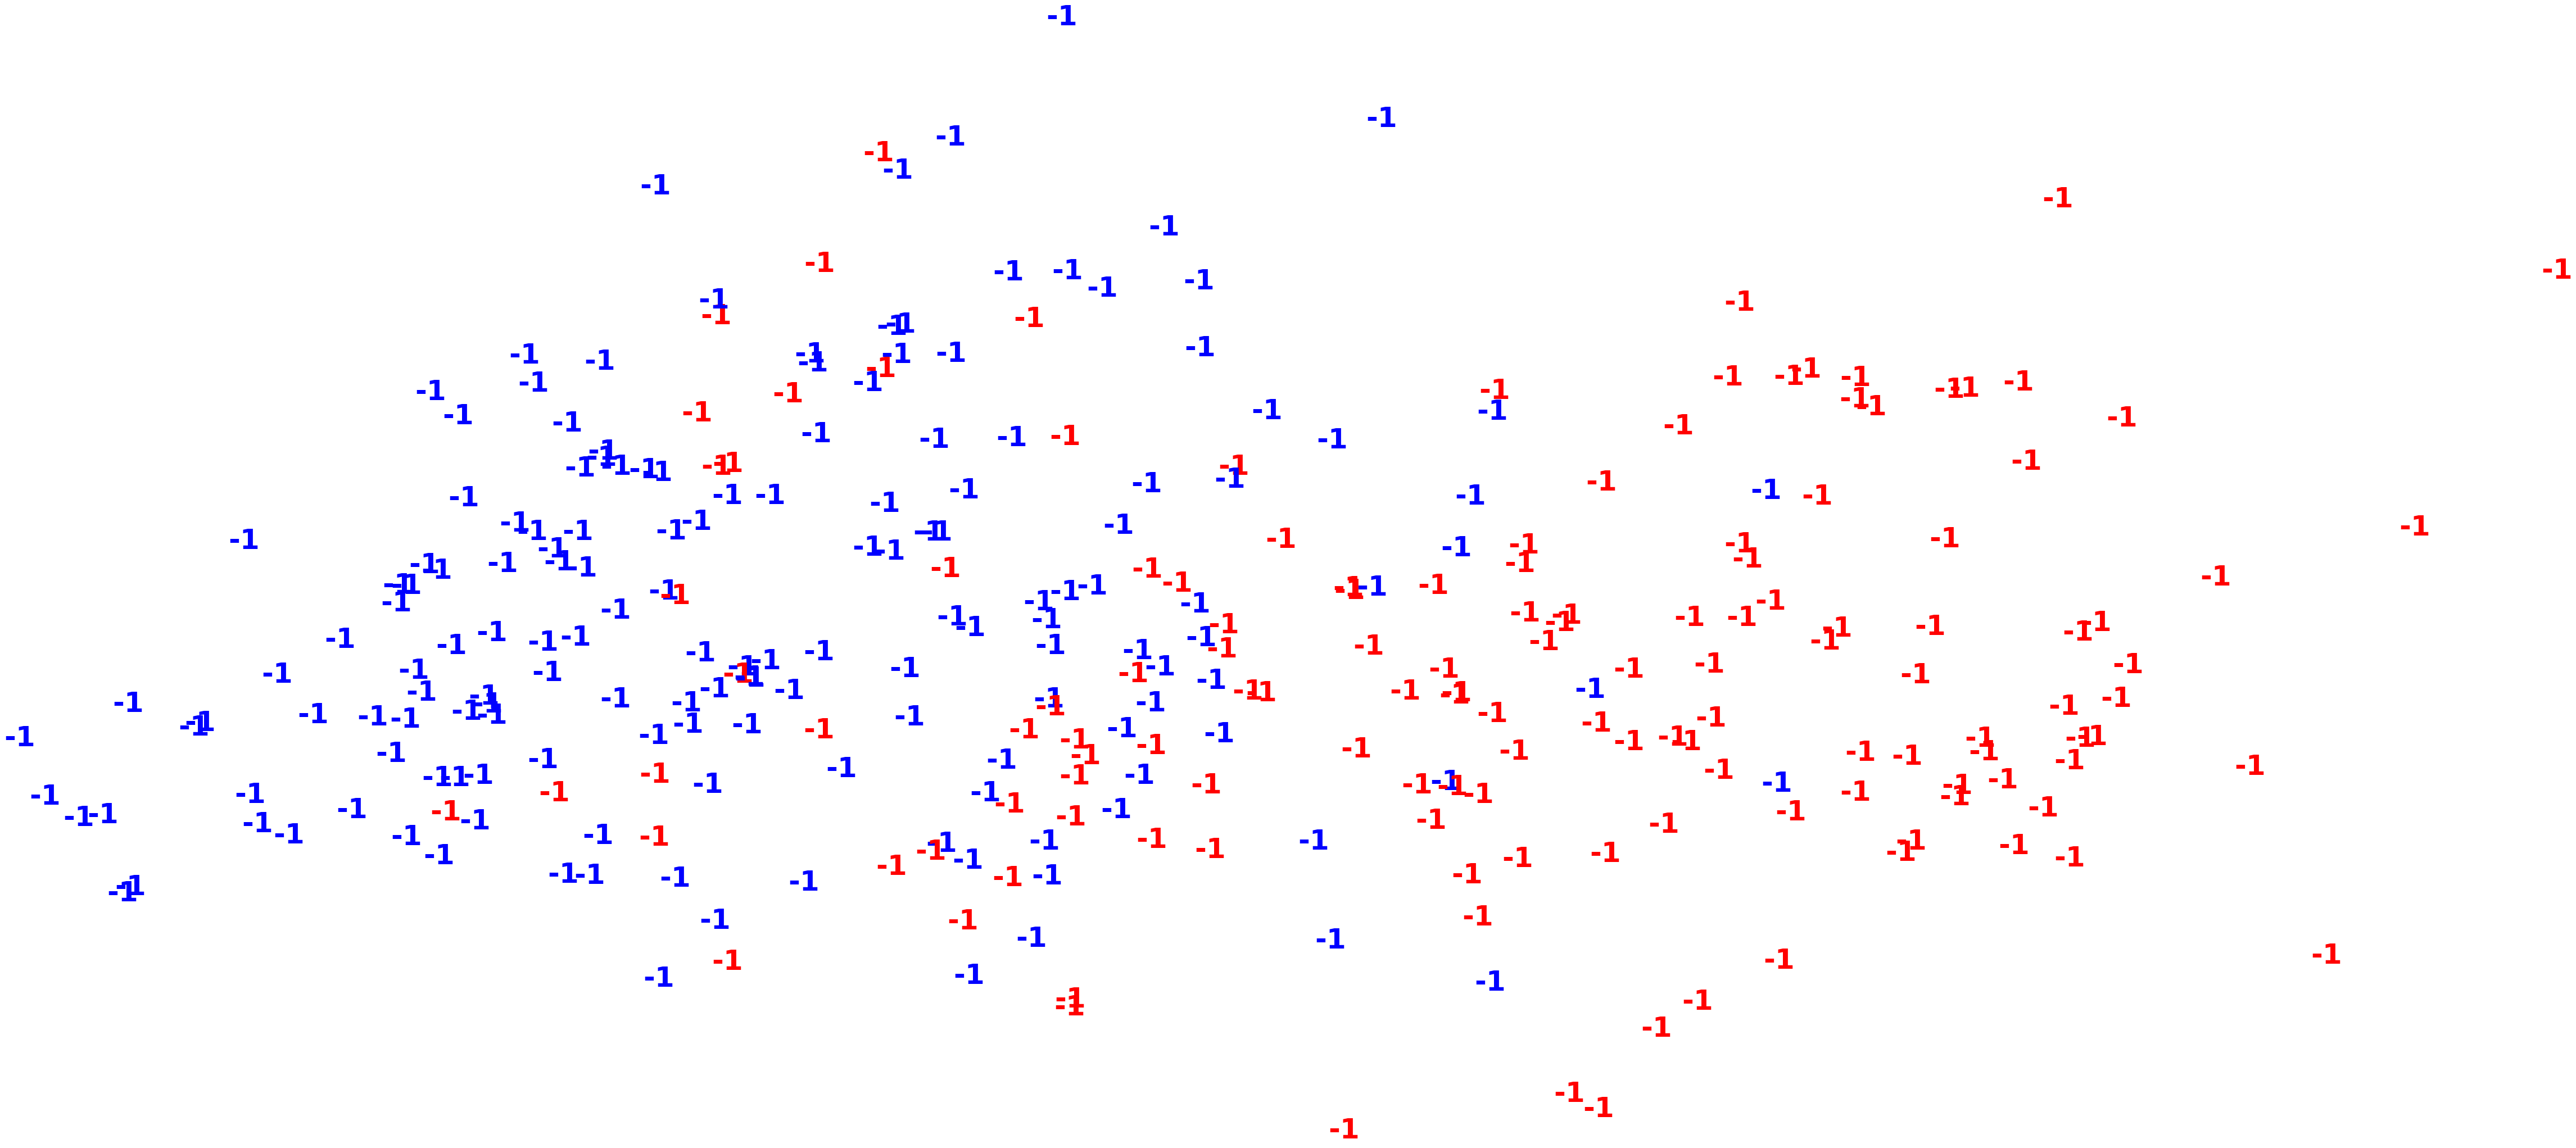

In [ ]:
for e in (0.5, 1):
  for minPts in (5, 6):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=e, min_samples=minPts)

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)

    print("epsilon:", e, "\tminPts:", minPts, "\tNumber clusters:",len(np.unique(clusters)))
    visualize(clusters)

###OUCH - Outliers Everywhere!!!

###2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?


minPts: 1 	Number clusters: 293


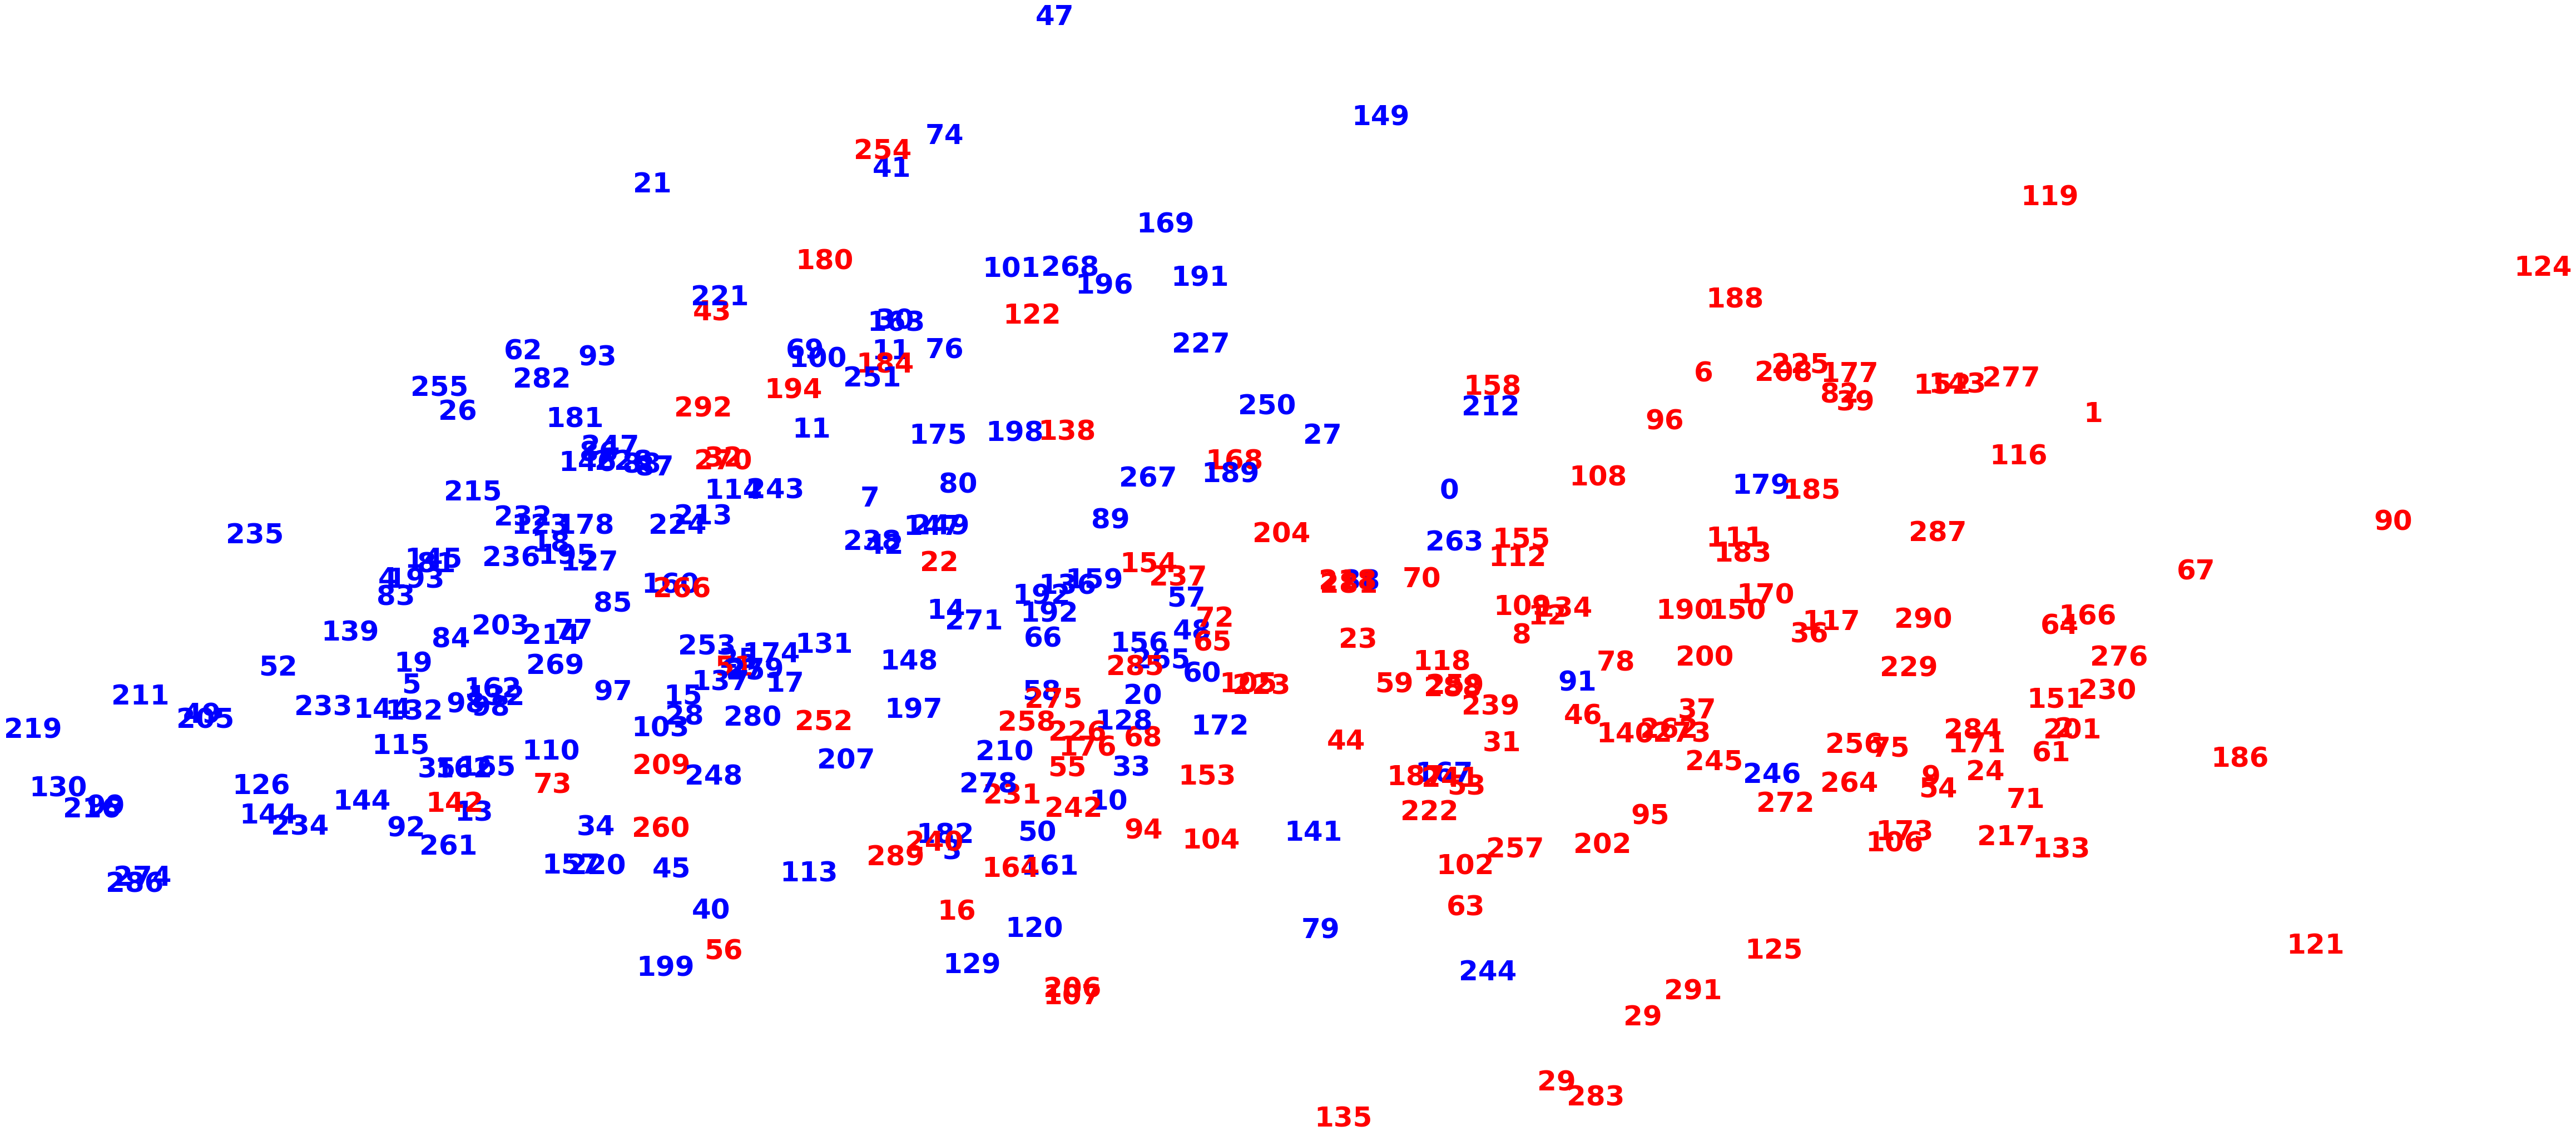

minPts: 3 	Number clusters: 2


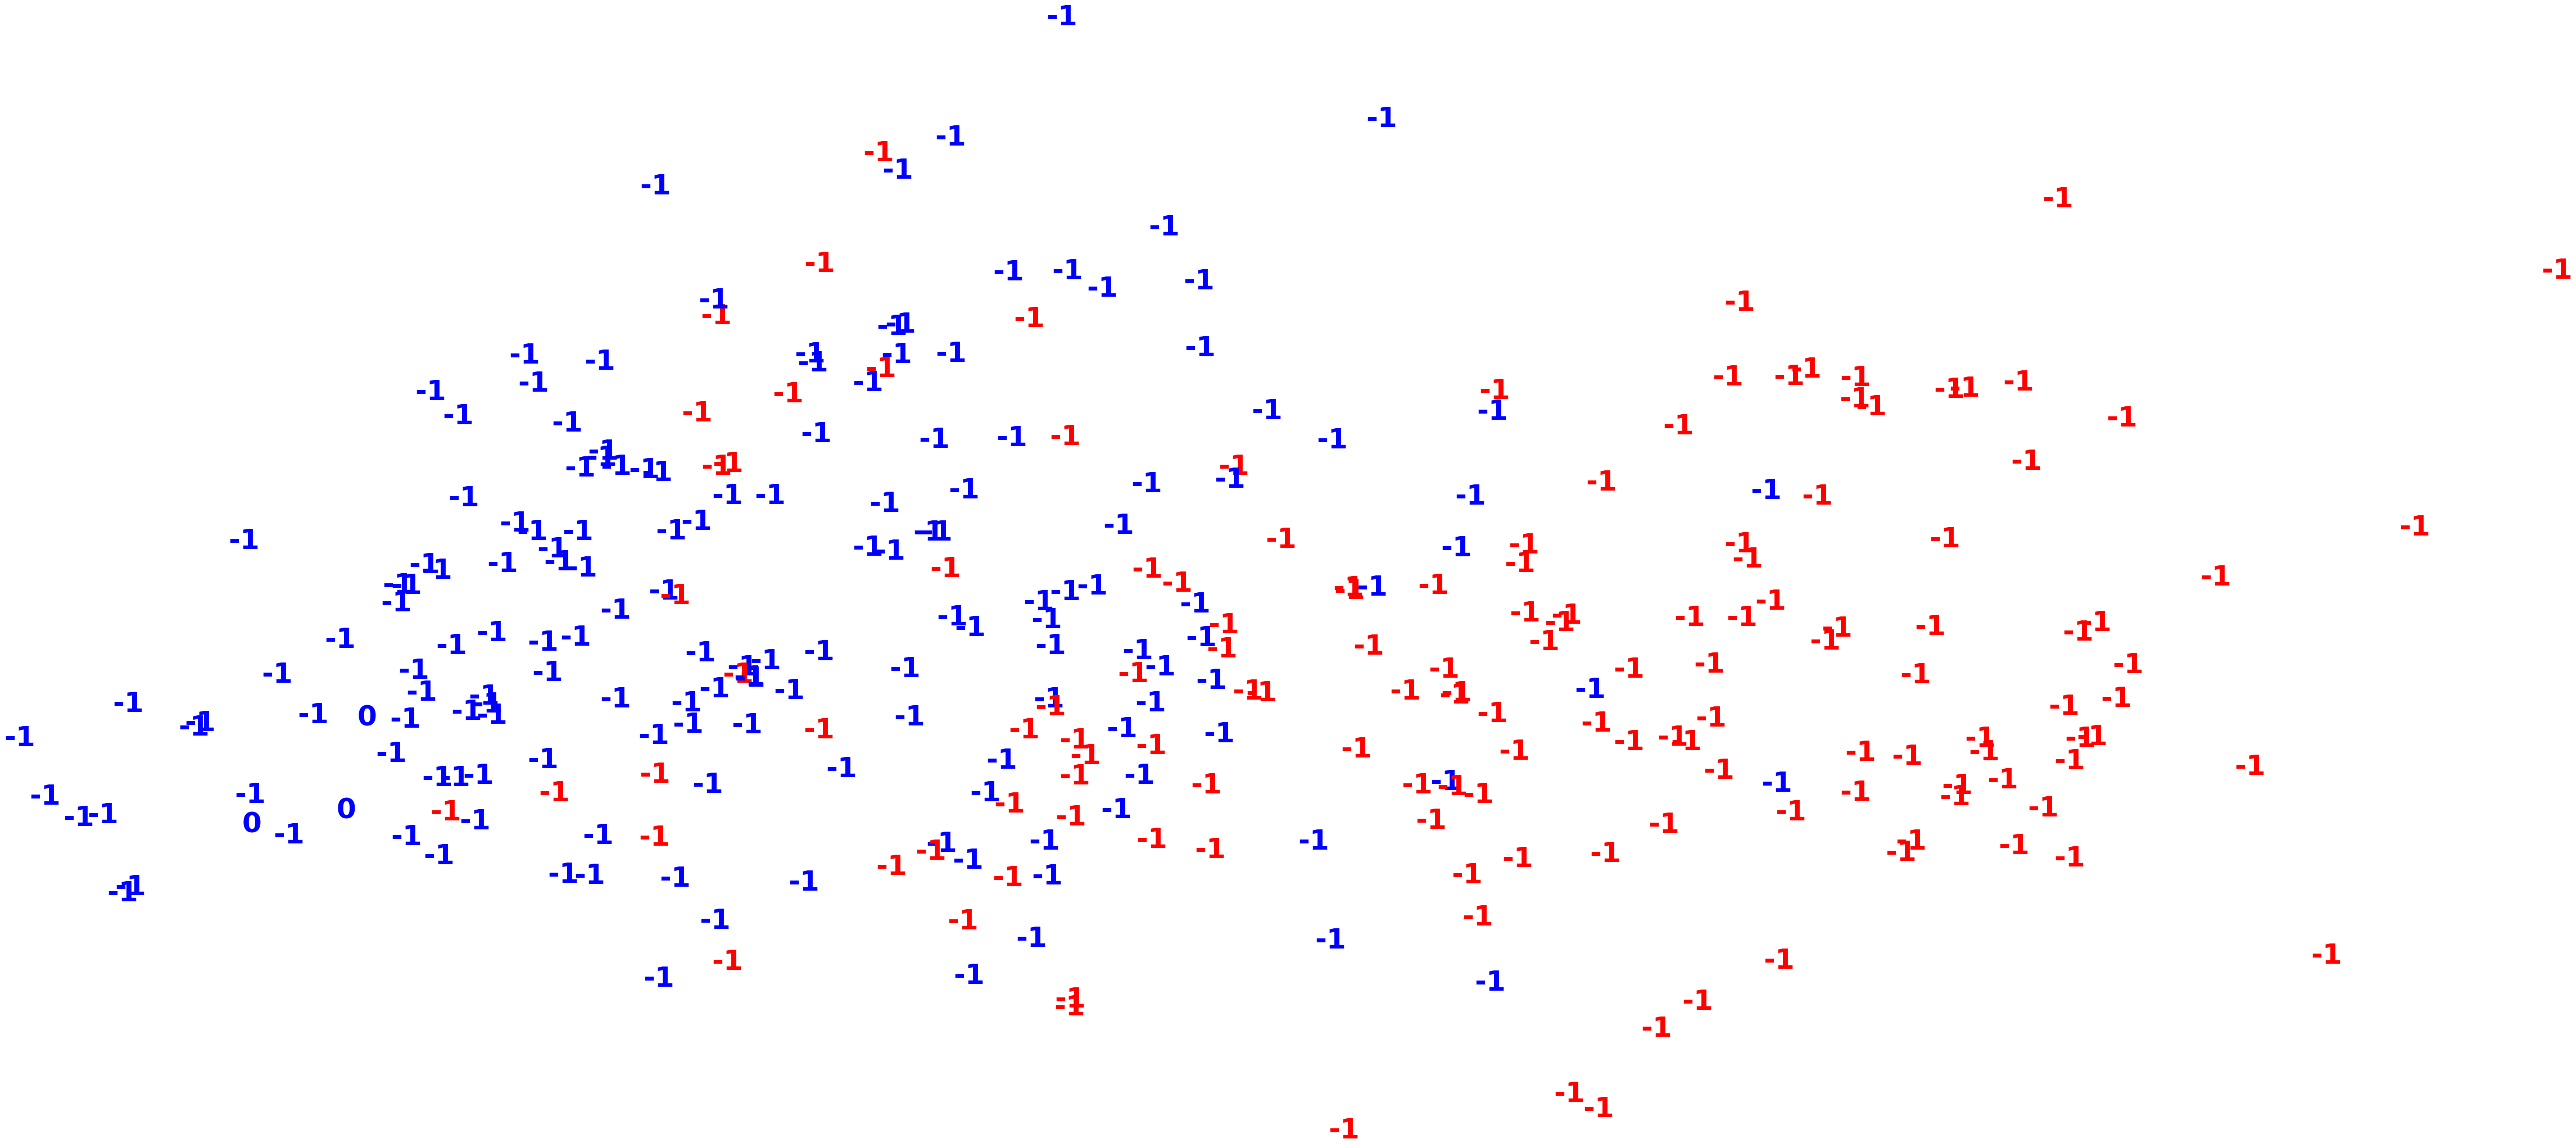

minPts: 5 	Number clusters: 1


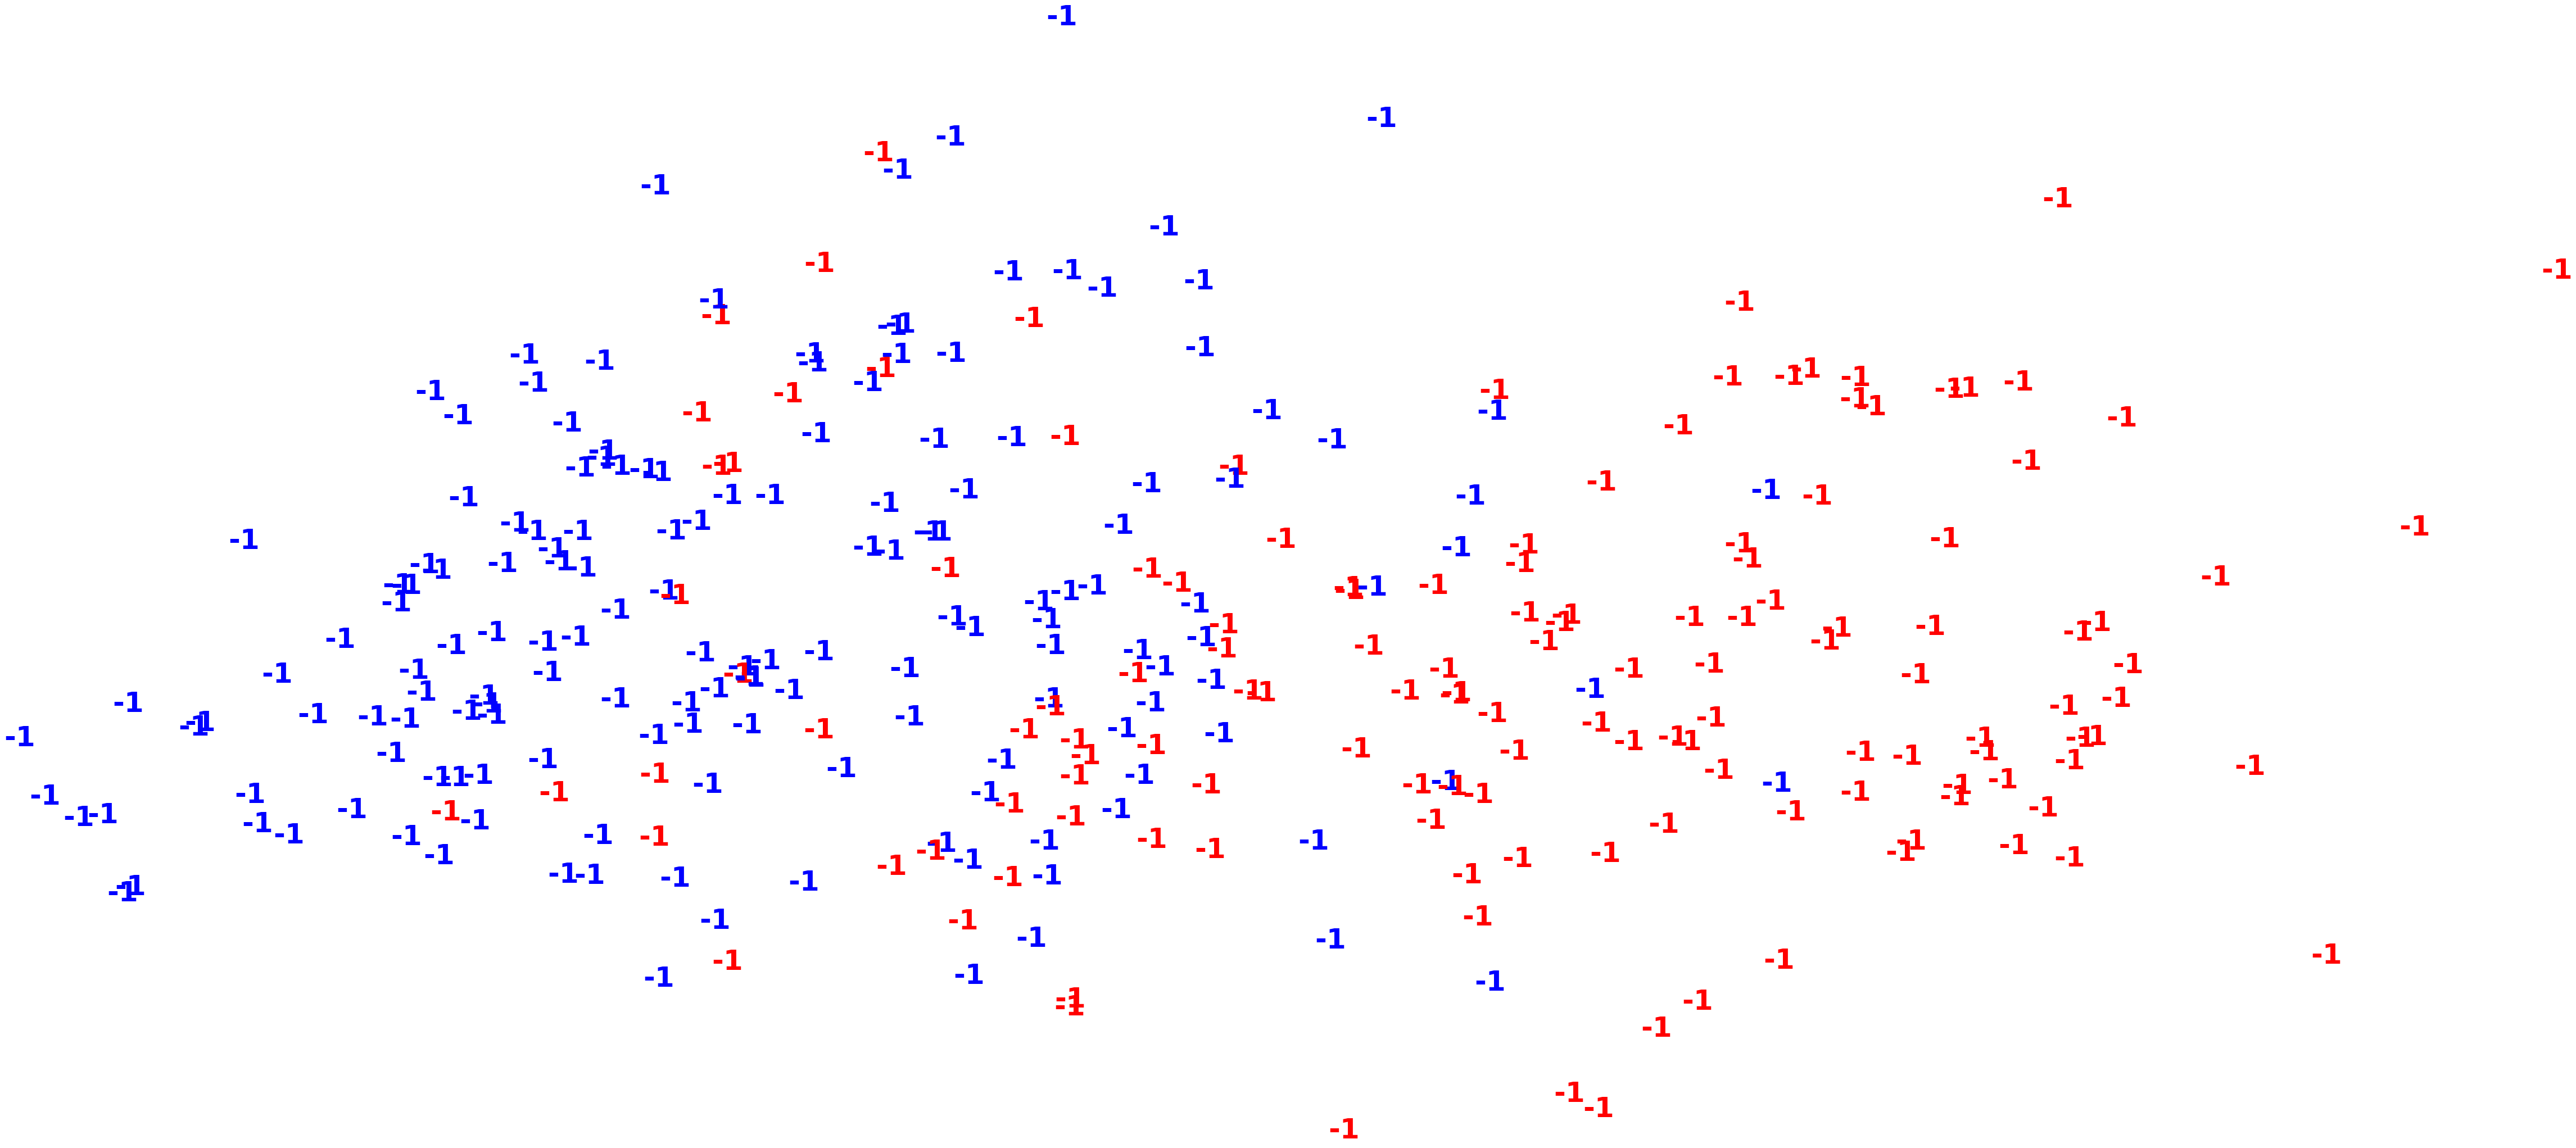

minPts: 7 	Number clusters: 1


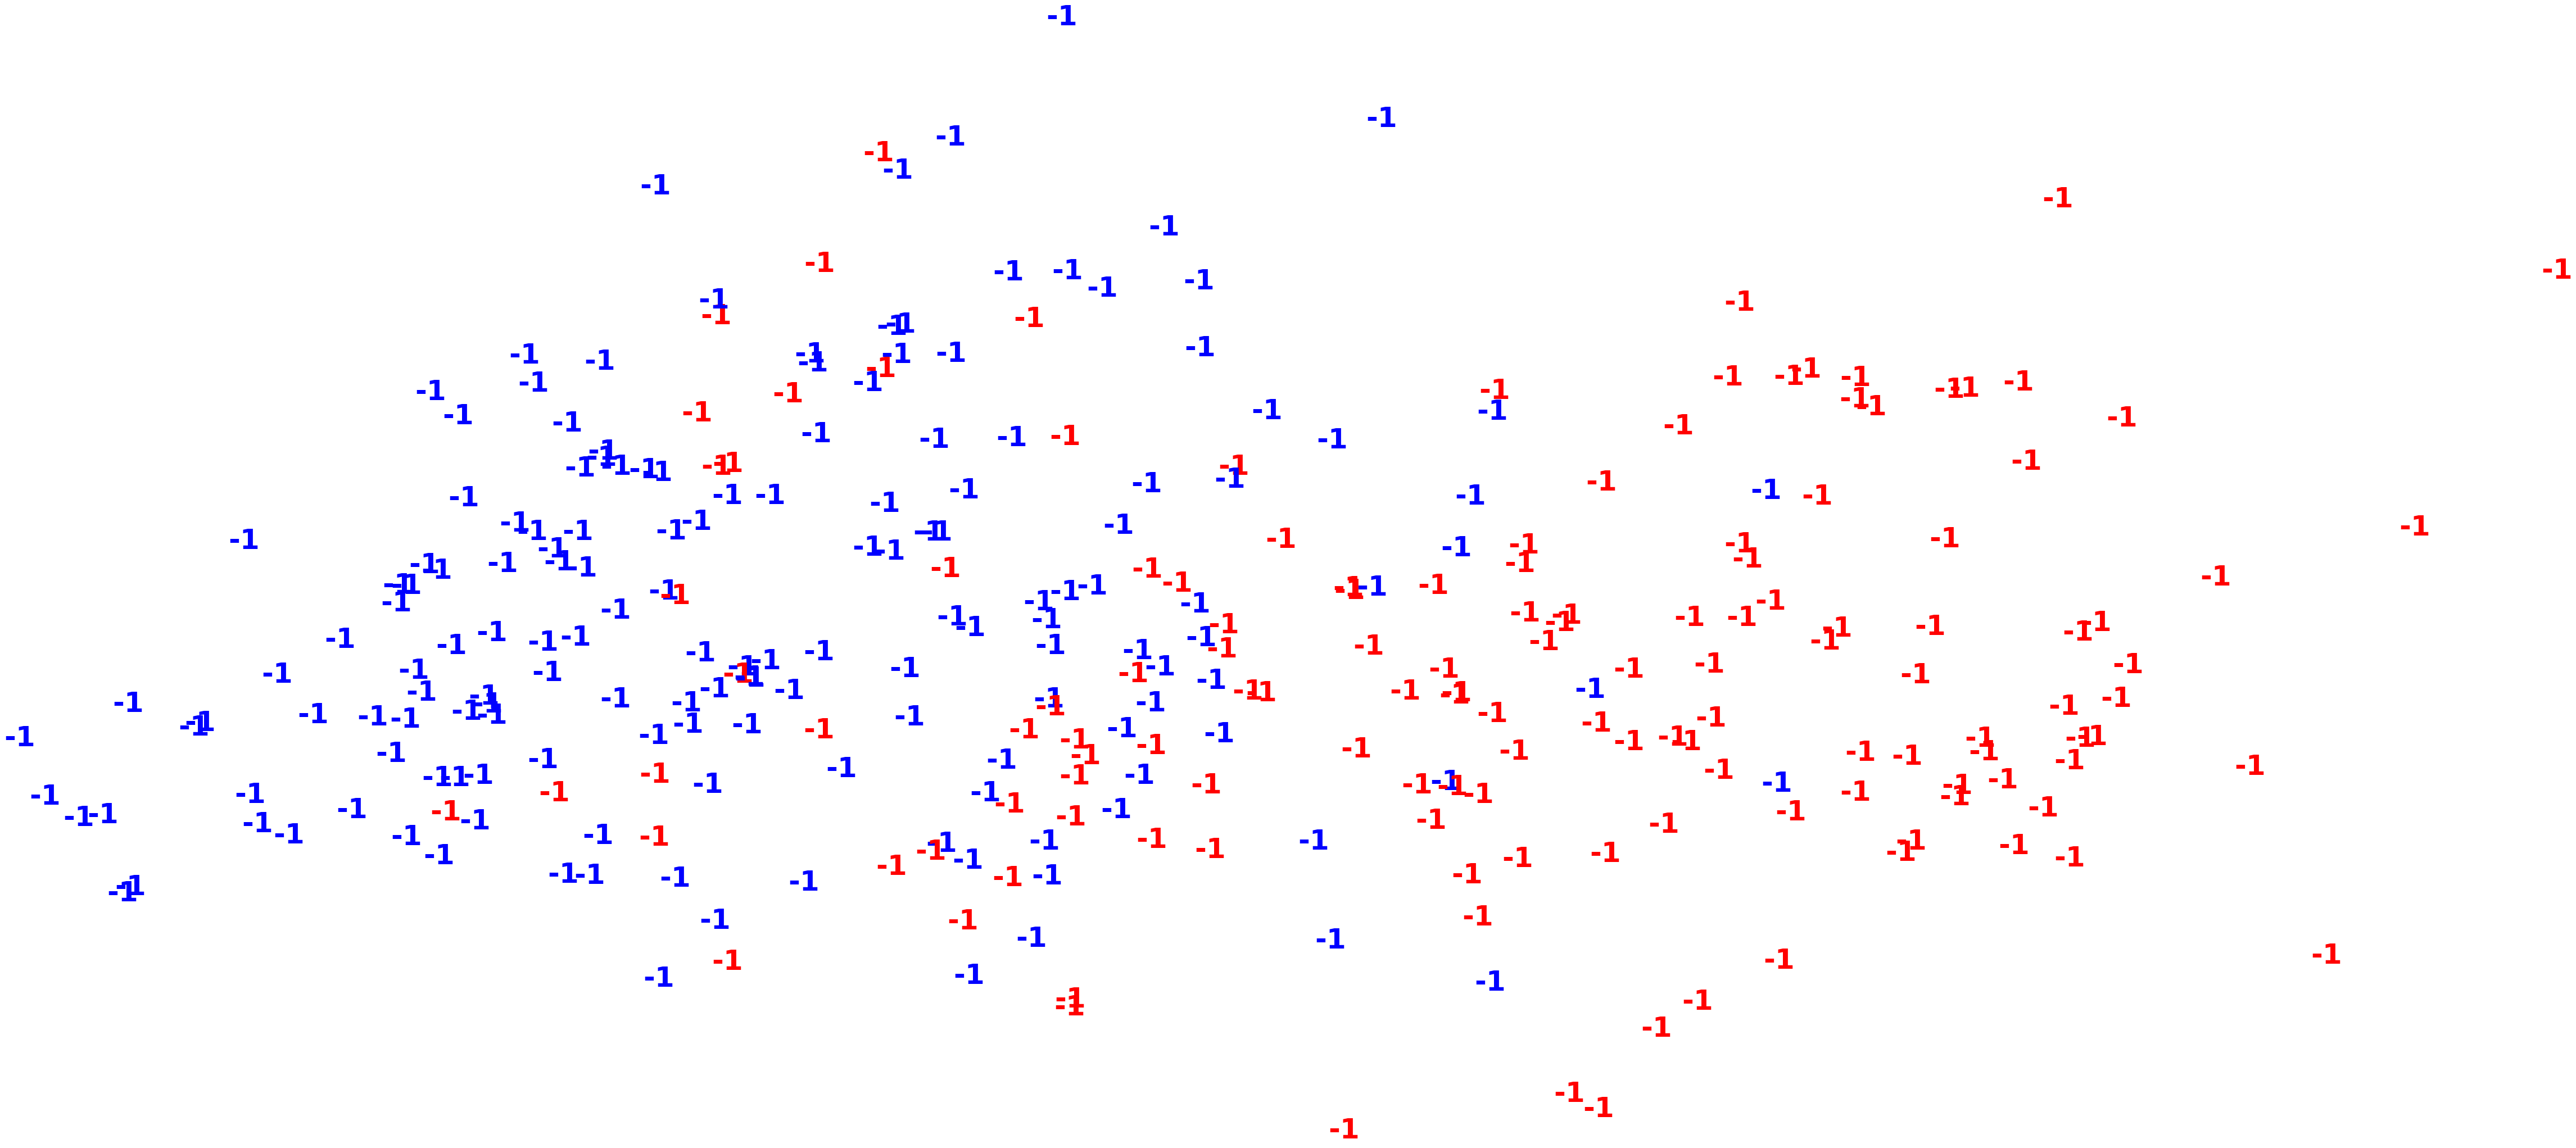

In [ ]:
for minPts in (1, 3, 5, 7):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=1, metric = 'euclidean', min_samples=minPts)

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)

    print("minPts:", minPts, "\tNumber clusters:",len(np.unique(clusters)))
    visualize(clusters)

###DBSCAN: default metric='euclidean' already!  1 point breaks the number of clusters into the number of data points - 1 cluster per point.  Every run after minPts is 1 yields 0 samples.  Everything is an outlier at -1.

###3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of eps. When you increase the value of eps, how does that affect the number of clusters that DBSCAN identifies?

epsilon(e): 0.5 	Number clusters: 300


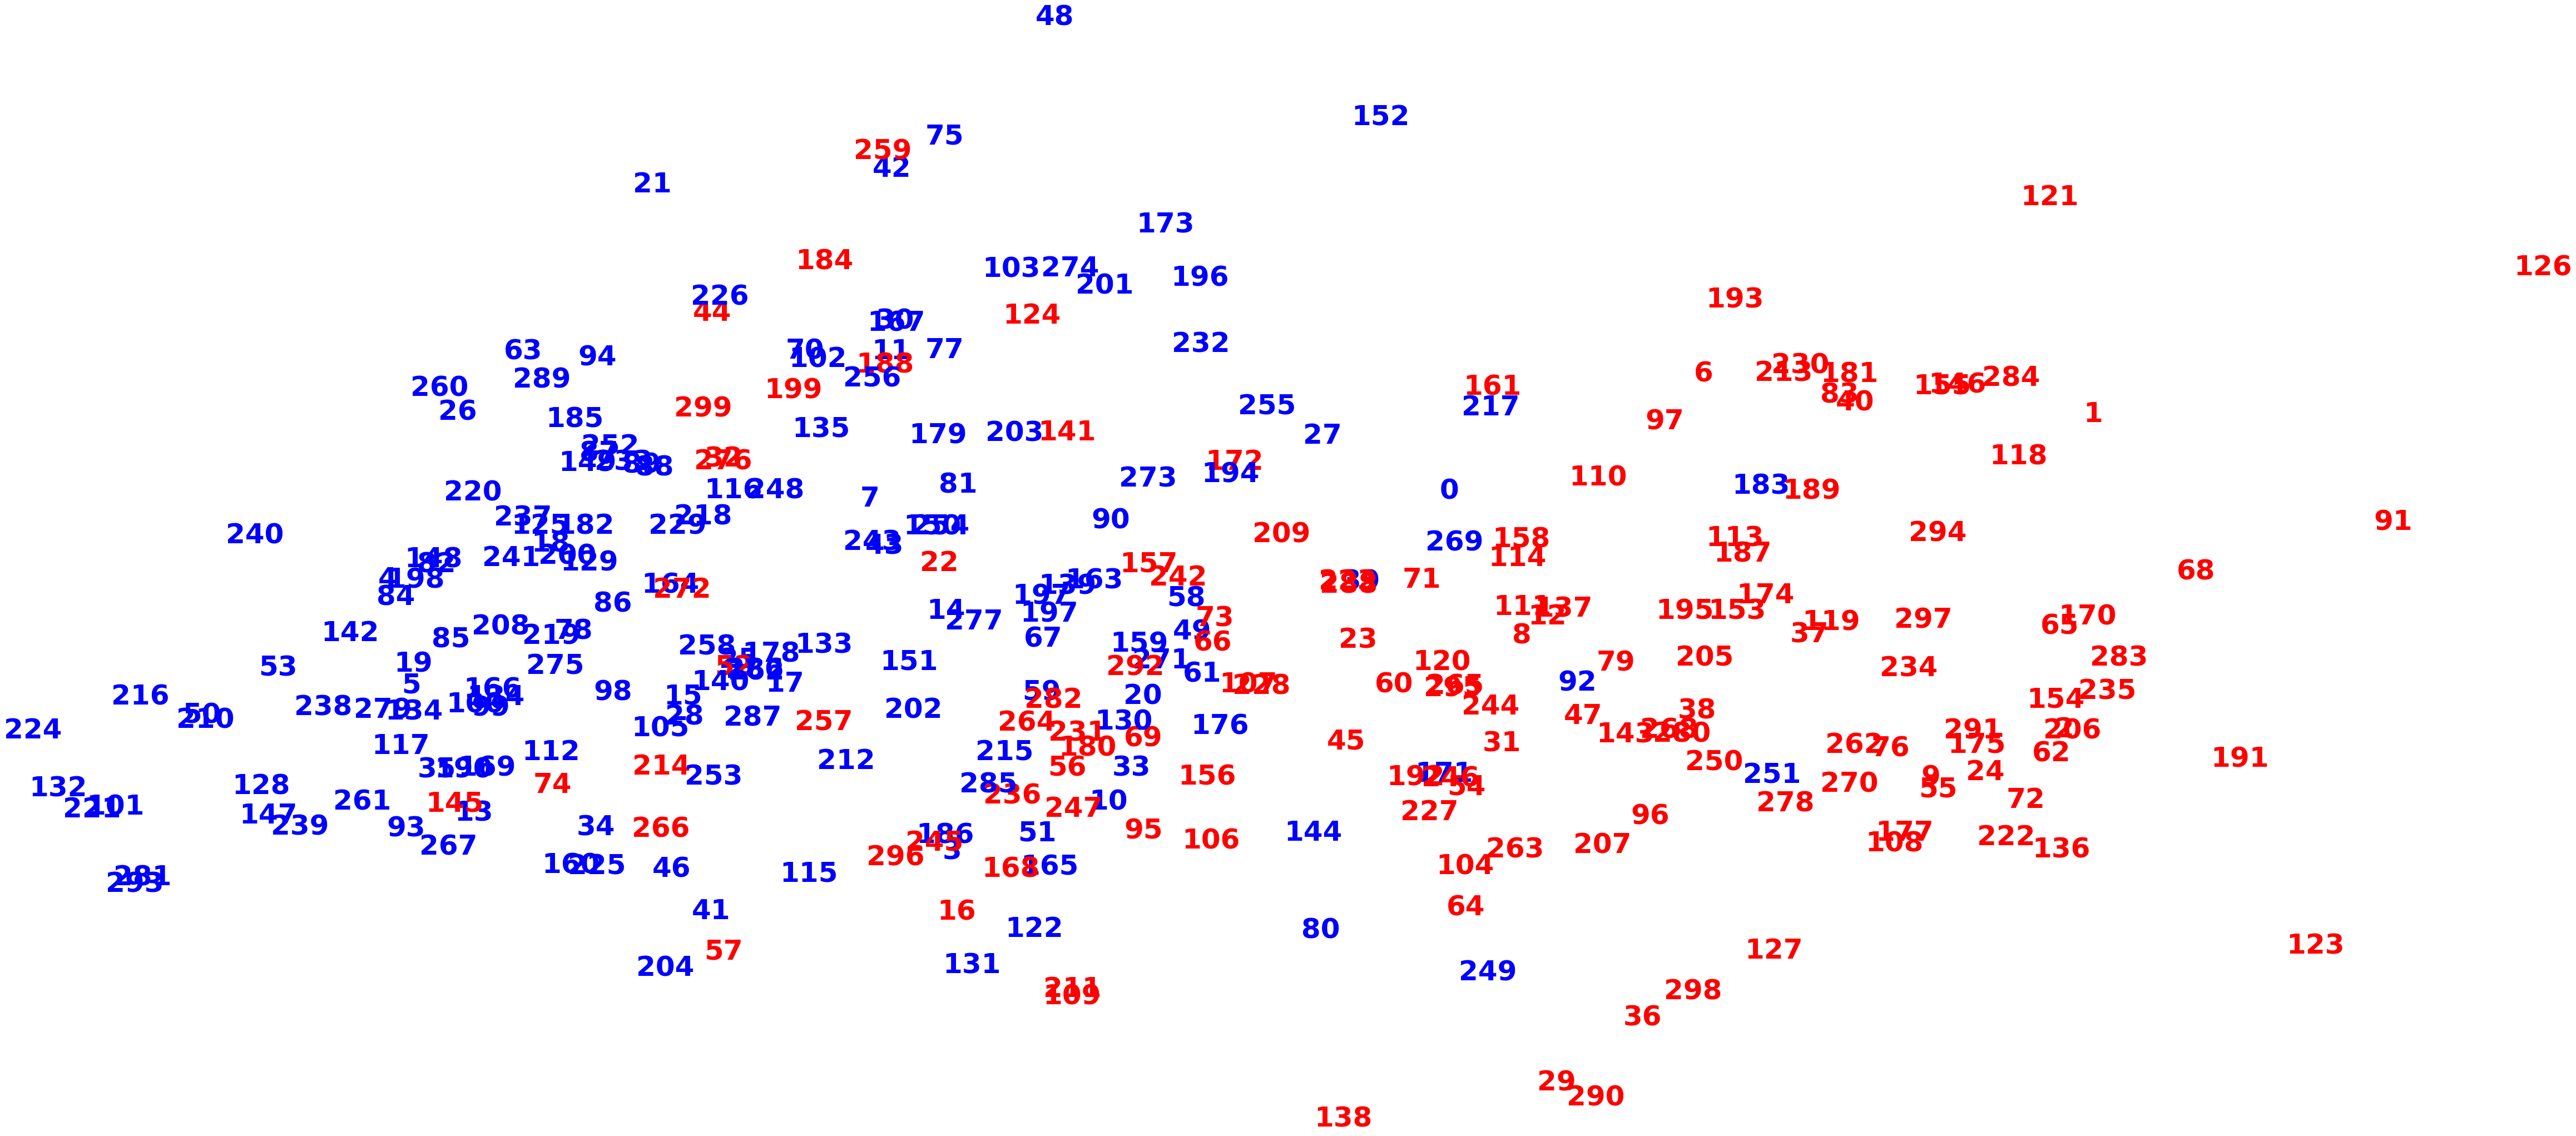

epsilon(e): 1 	Number clusters: 293


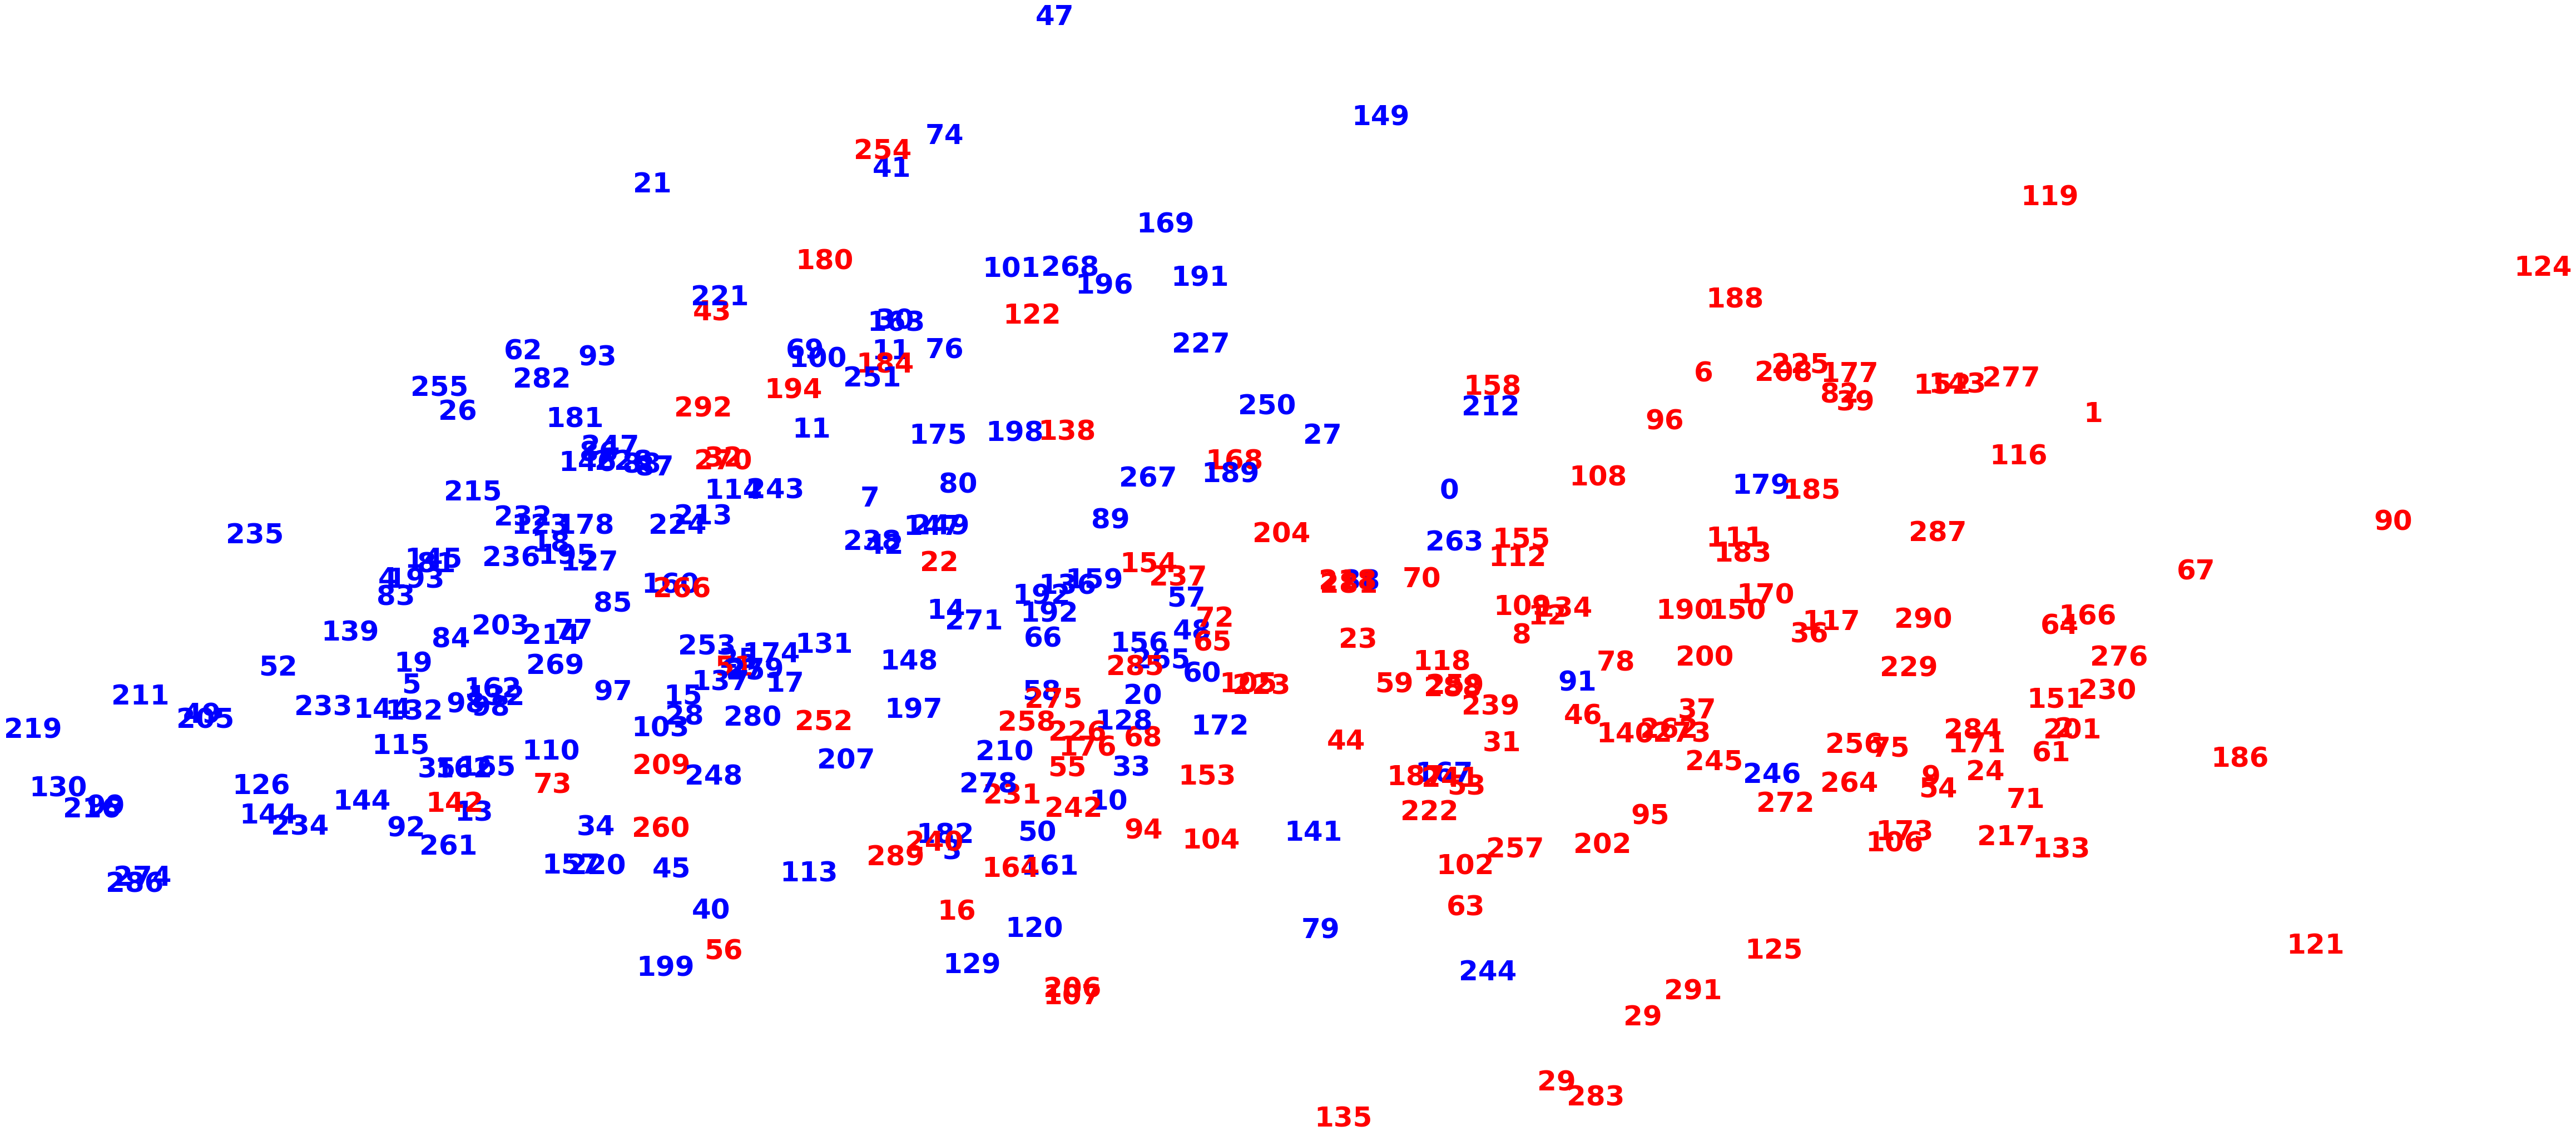

epsilon(e): 1.5 	Number clusters: 252


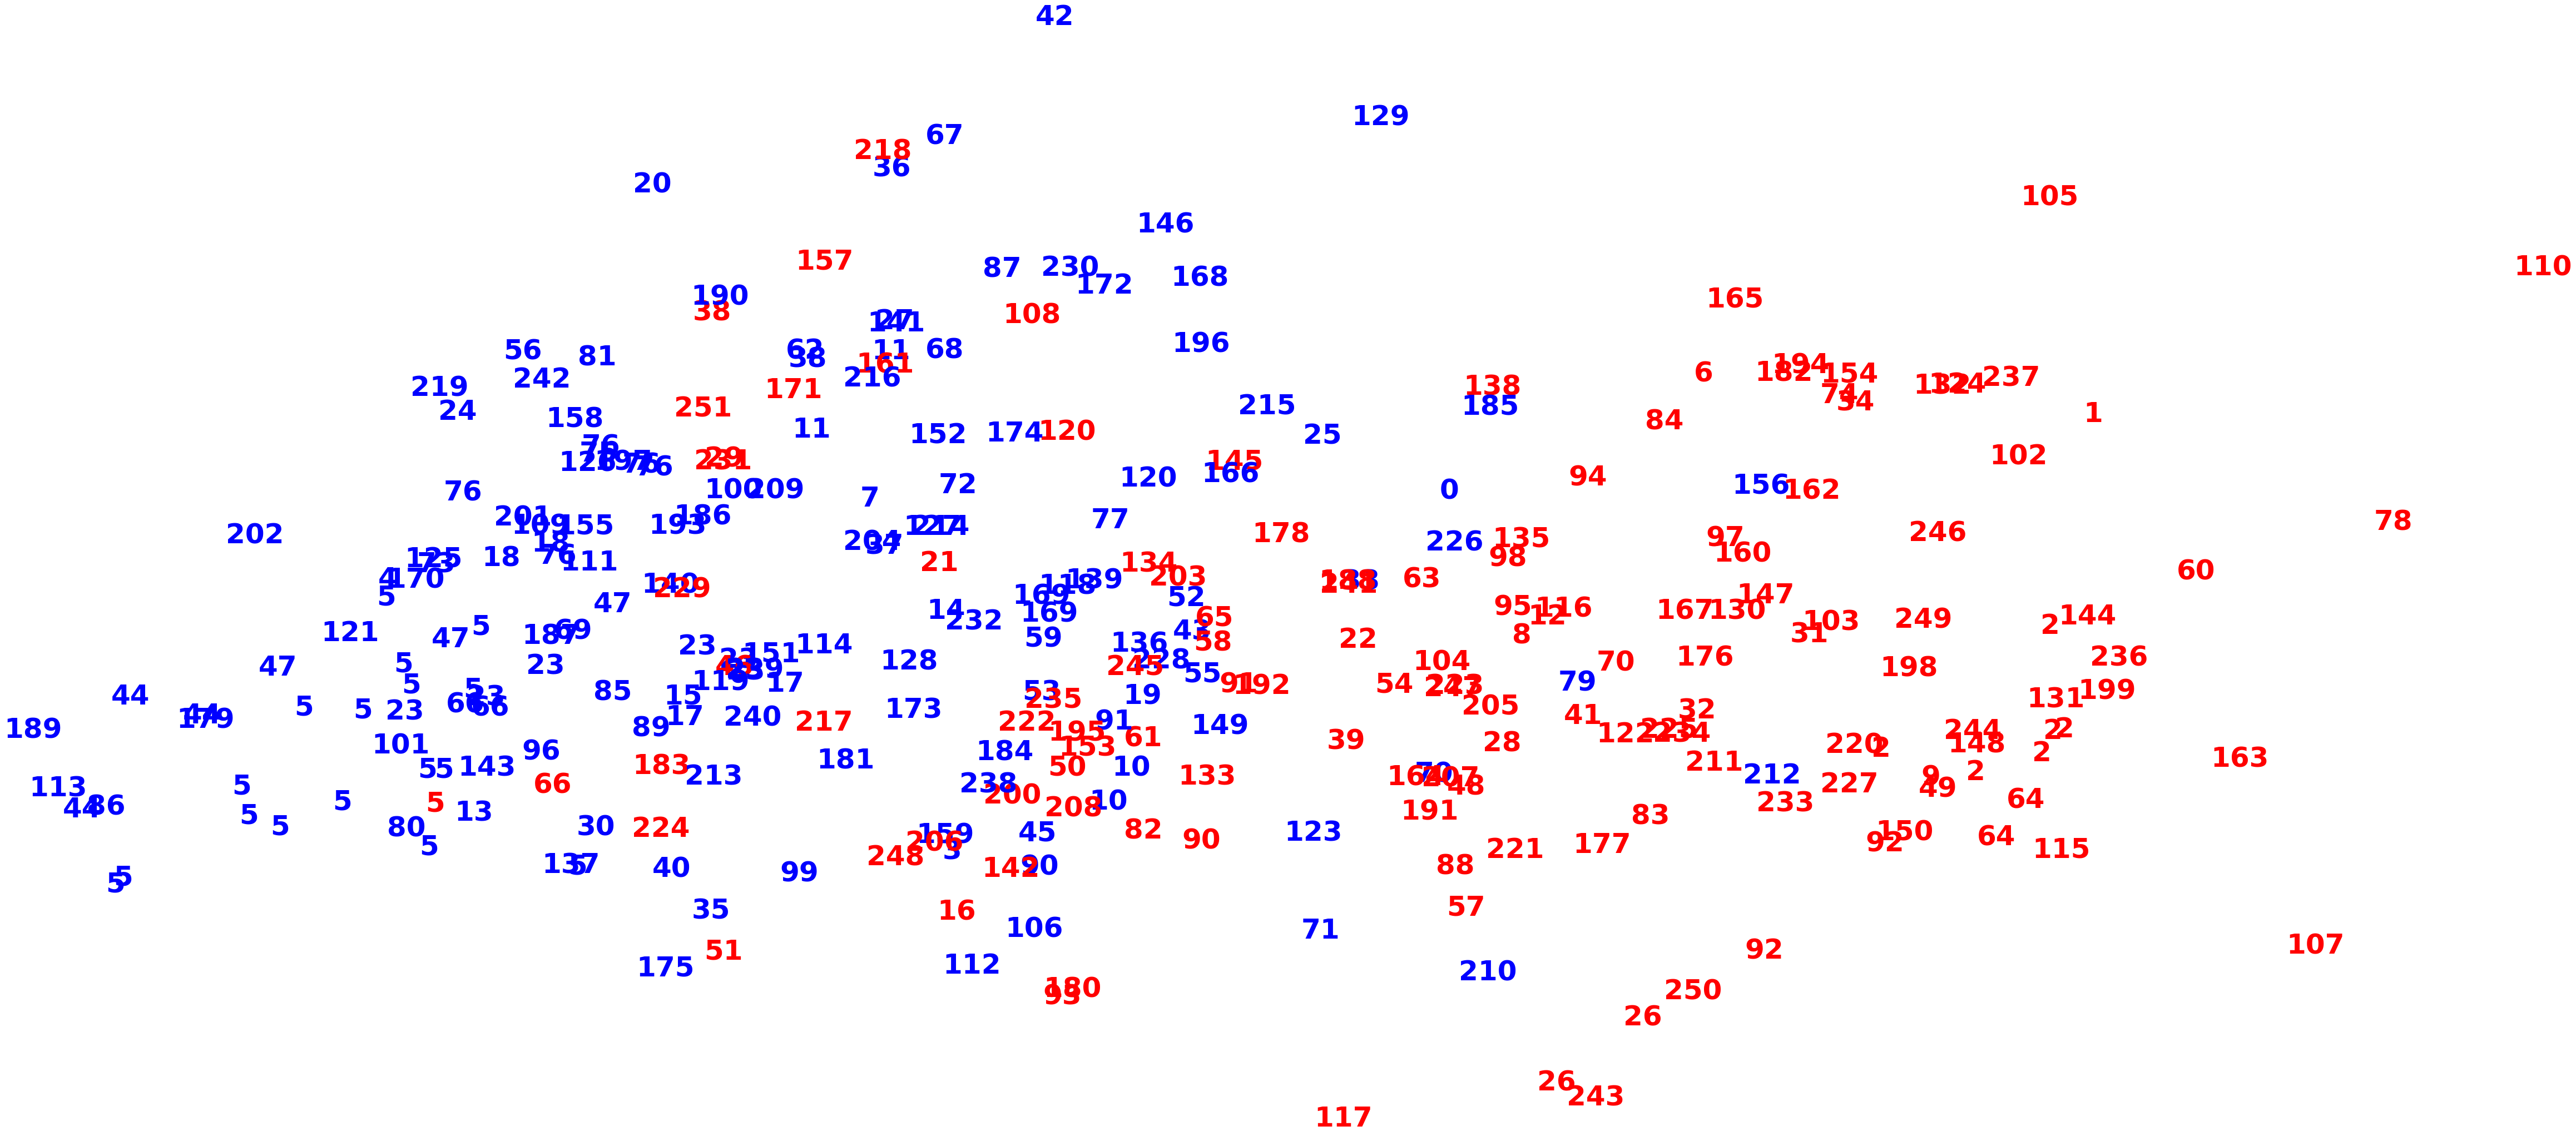

epsilon(e): 2 	Number clusters: 178


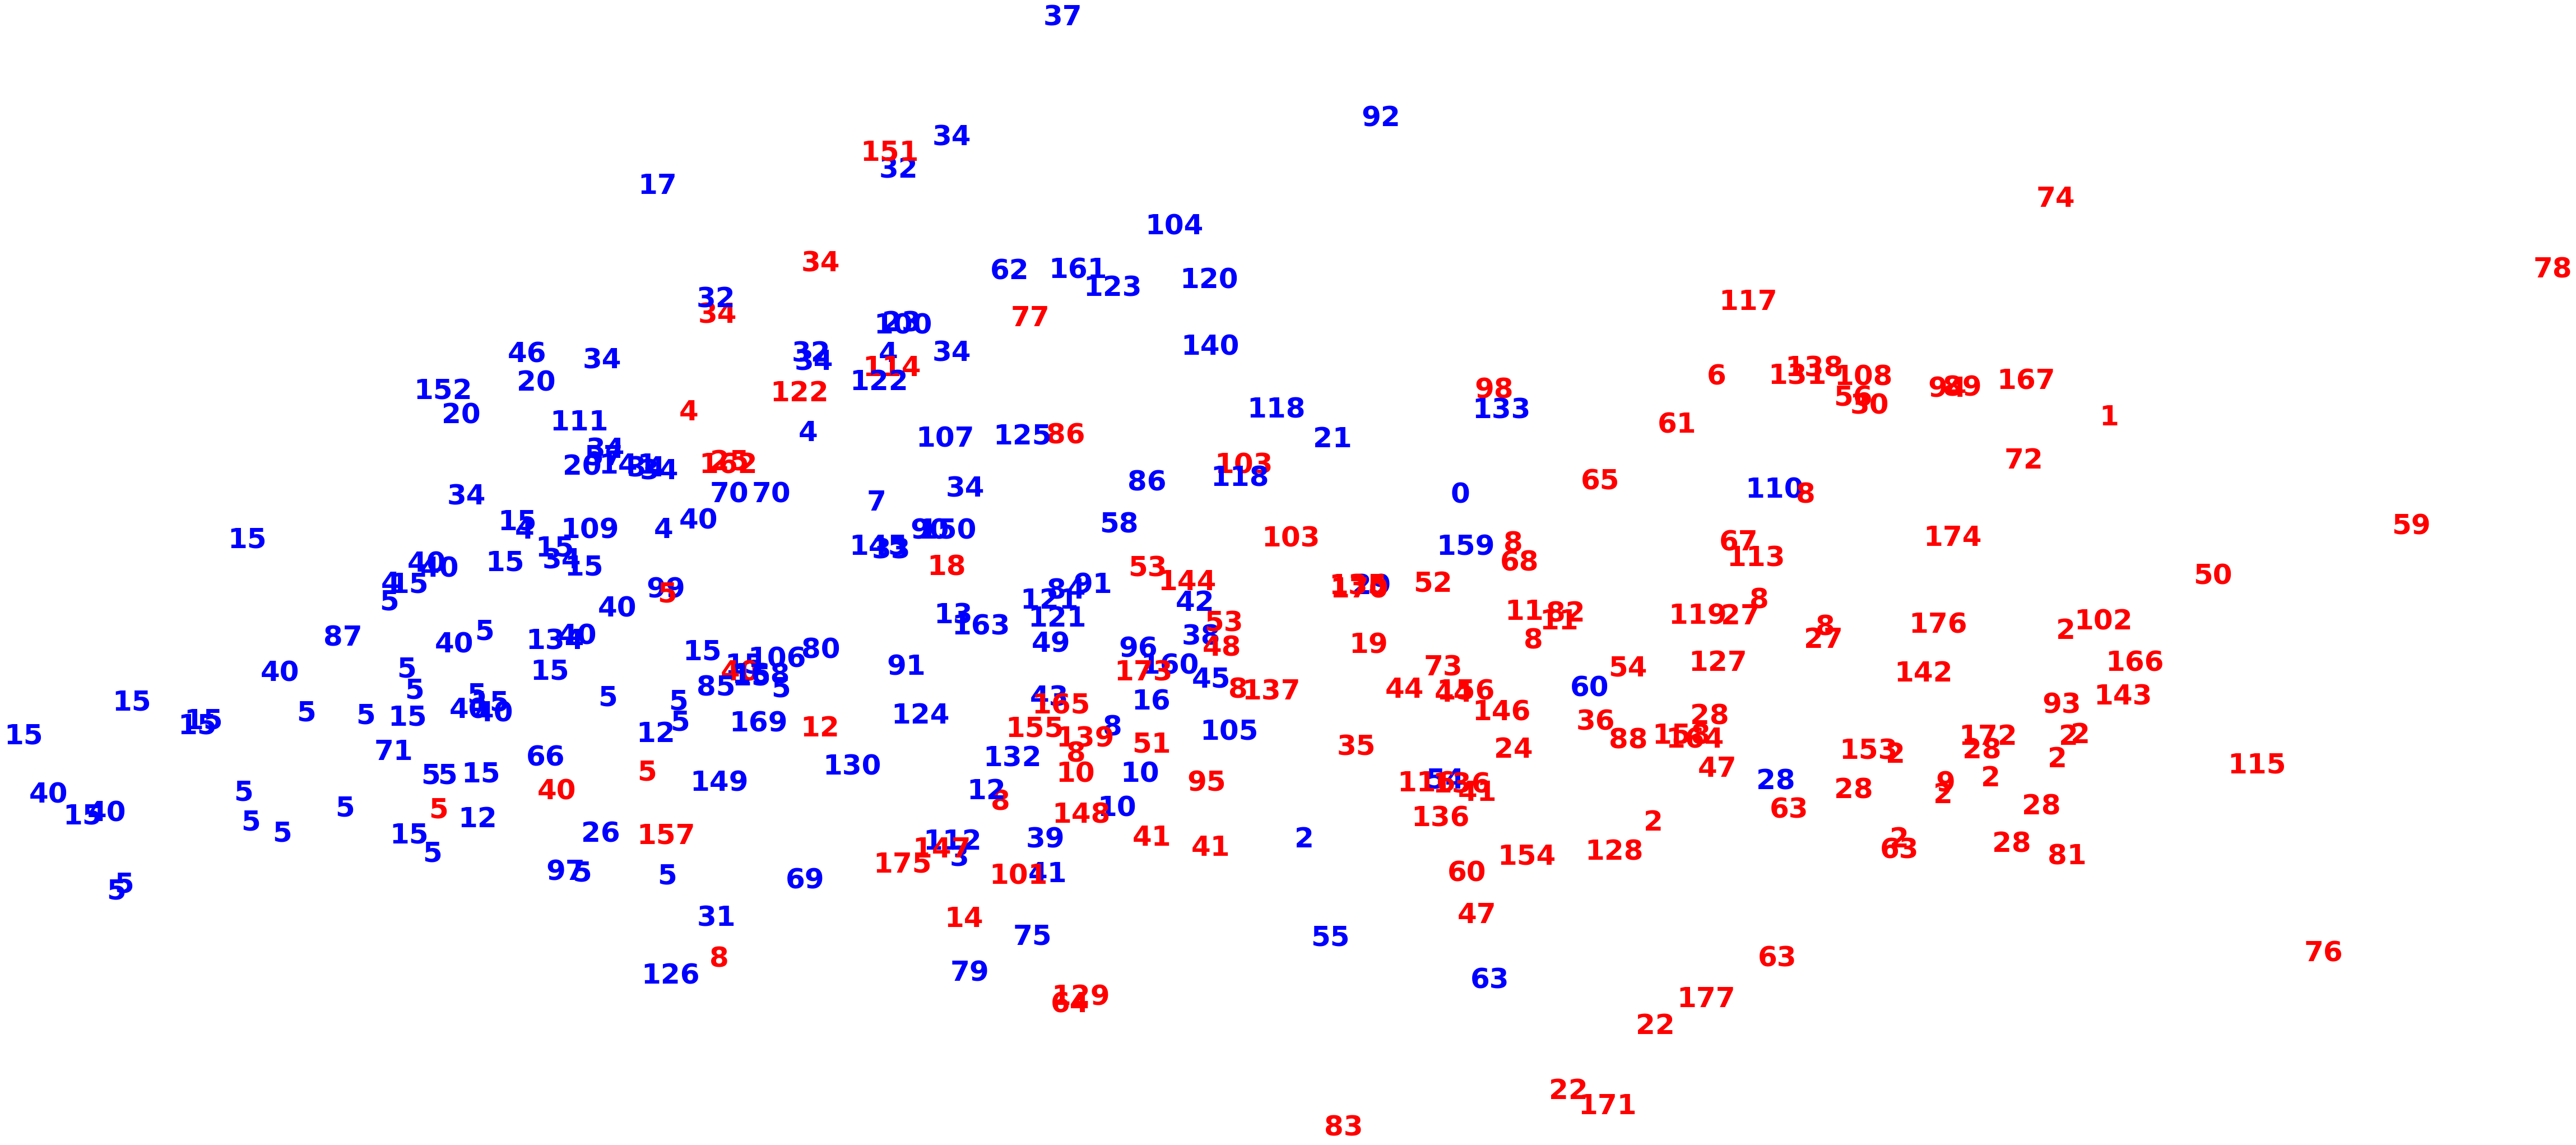

epsilon(e): 2.5 	Number clusters: 84


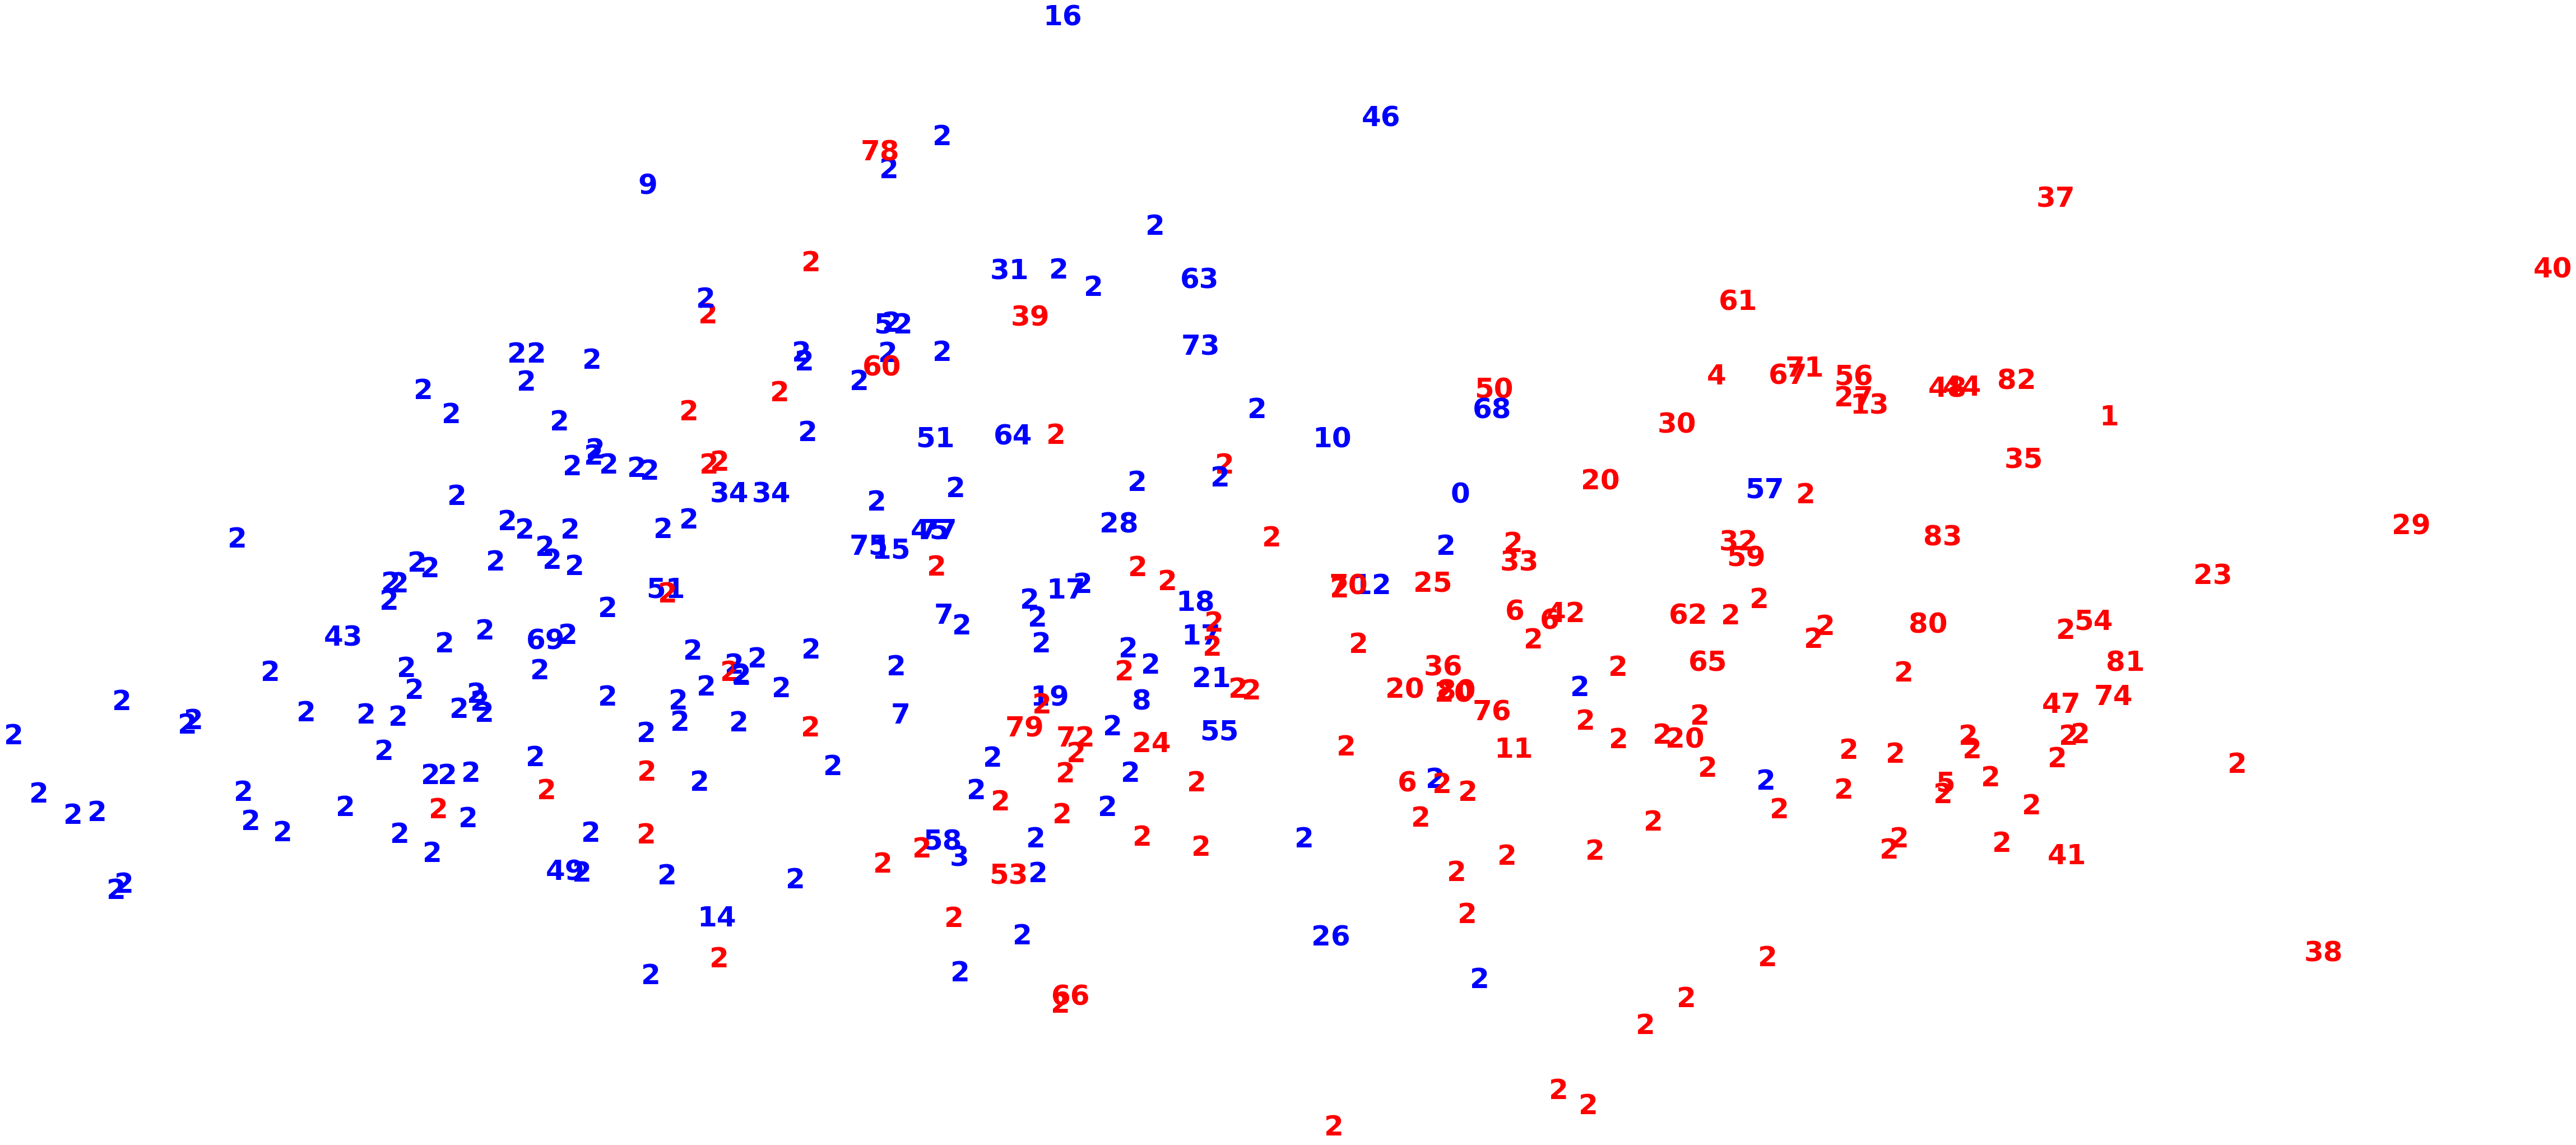

epsilon(e): 3 	Number clusters: 35


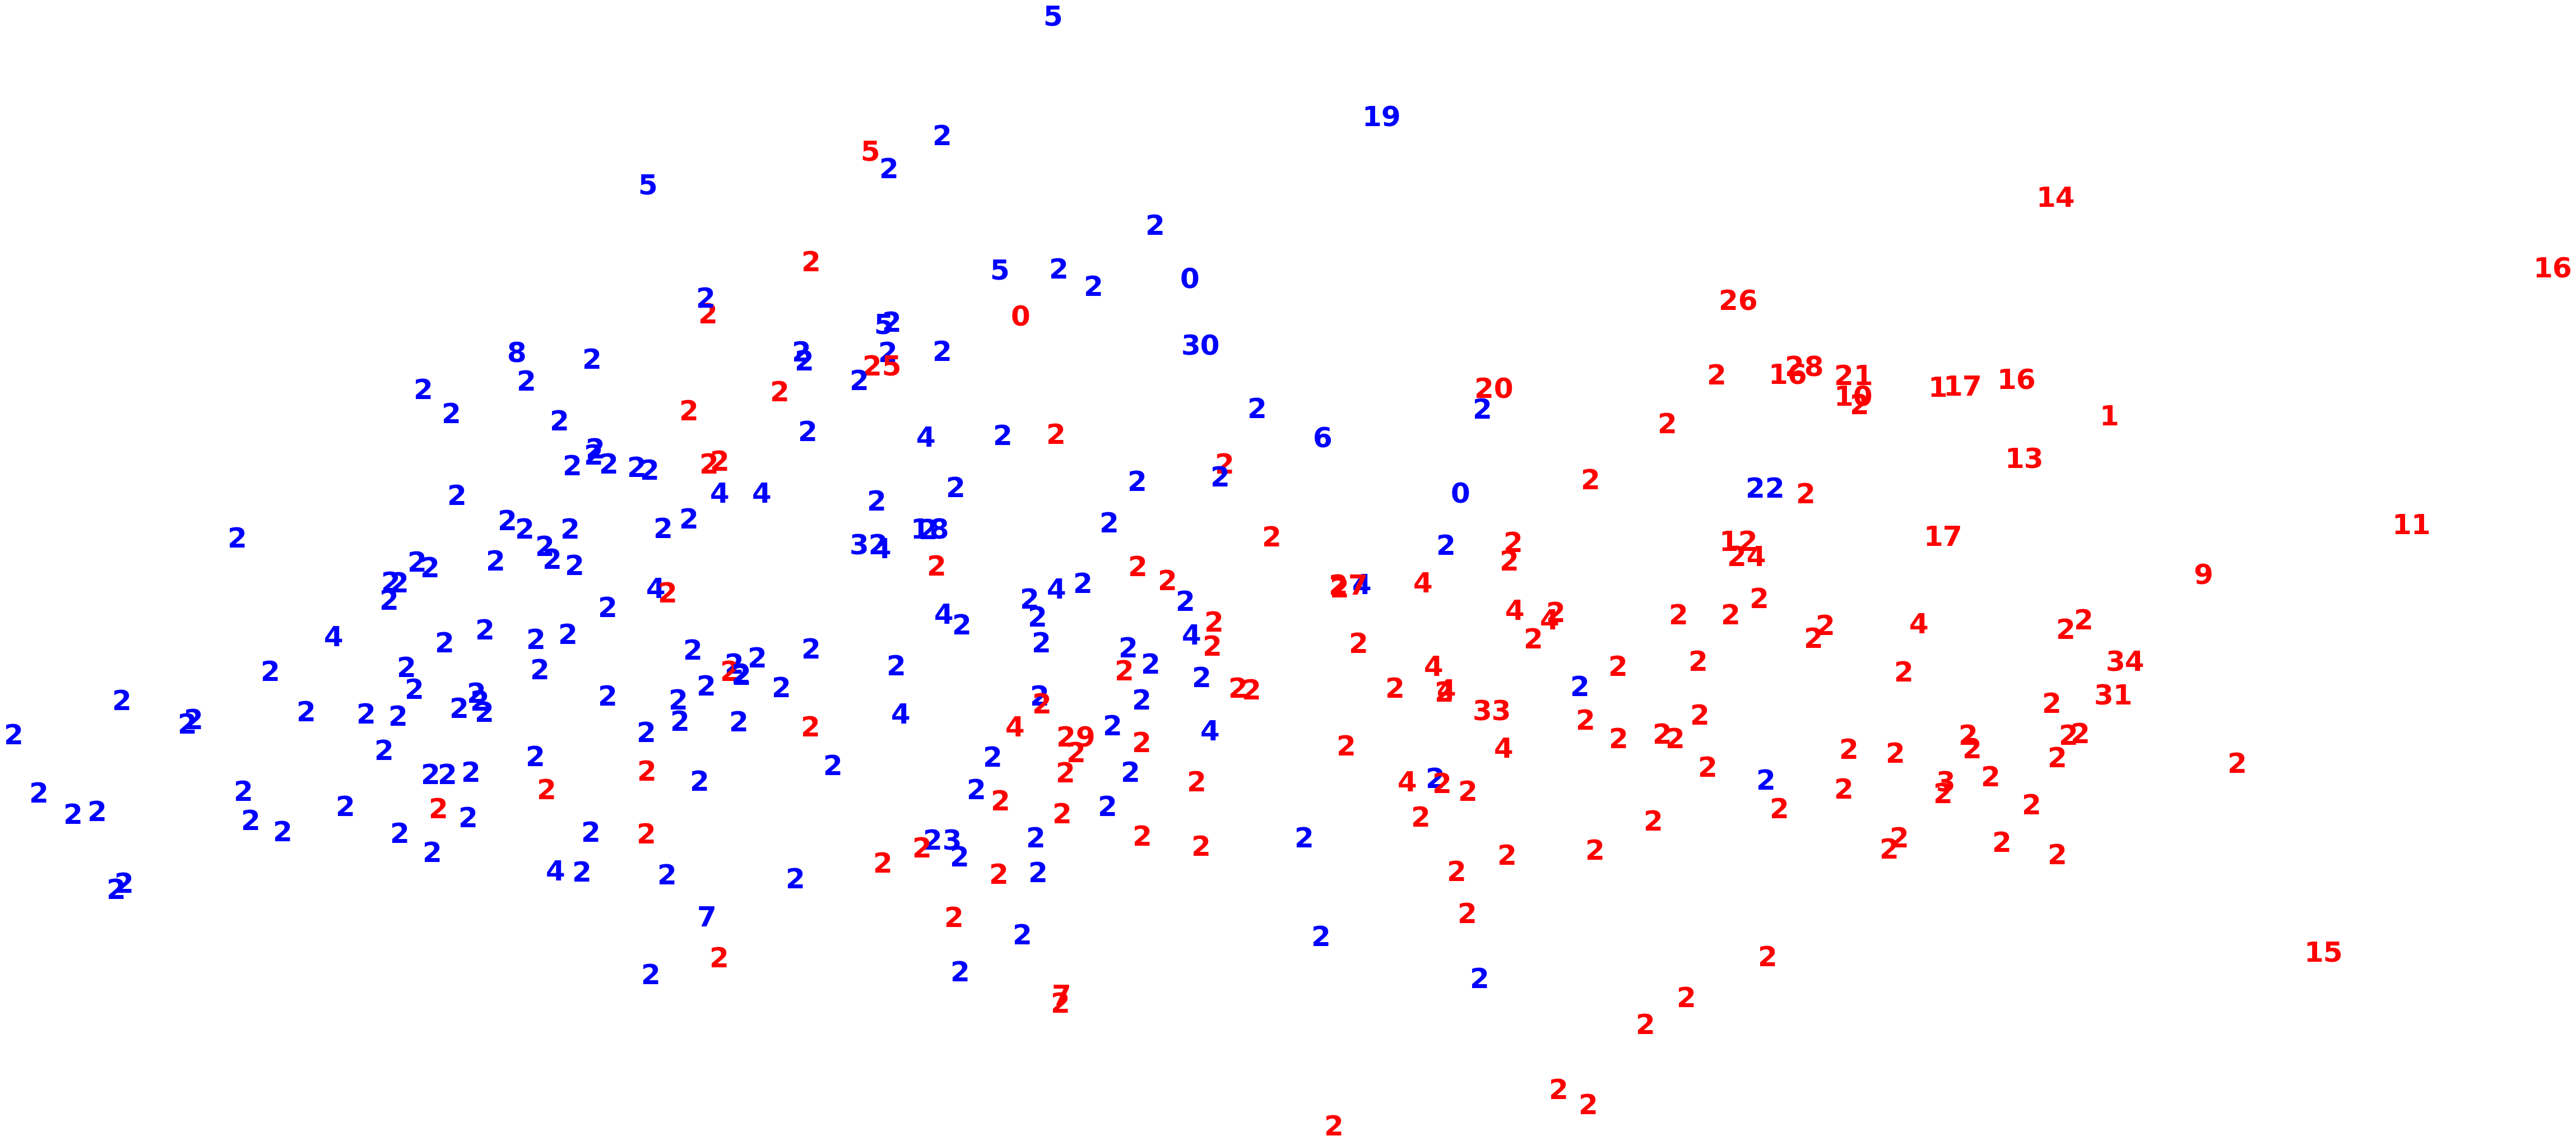

epsilon(e): 3.5 	Number clusters: 11


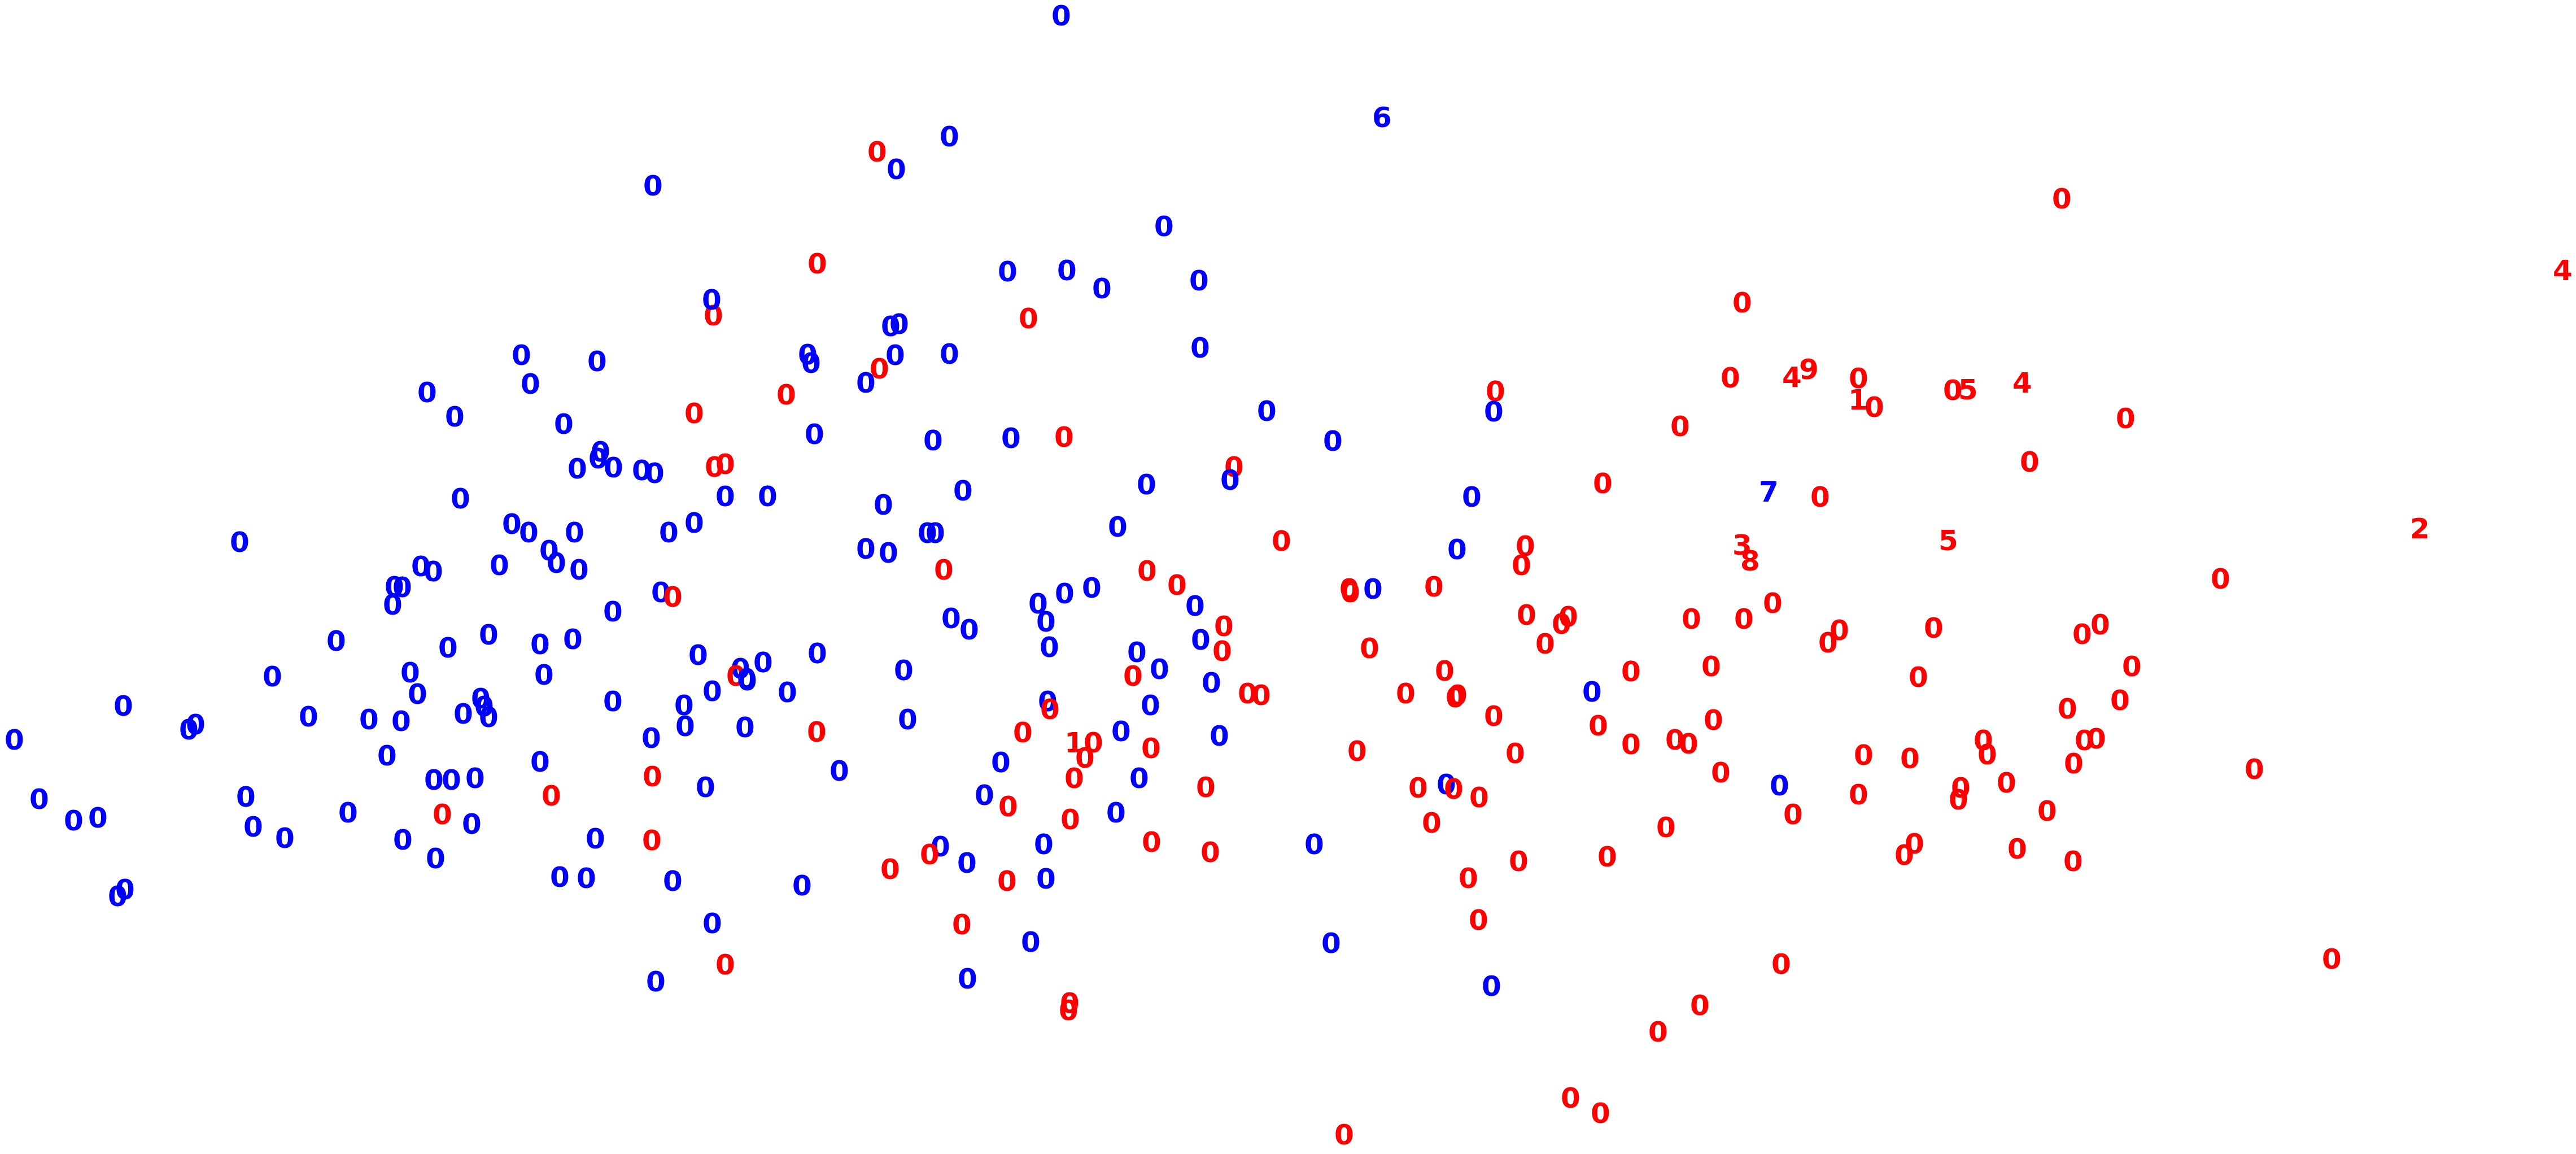

epsilon(e): 4 	Number clusters: 3


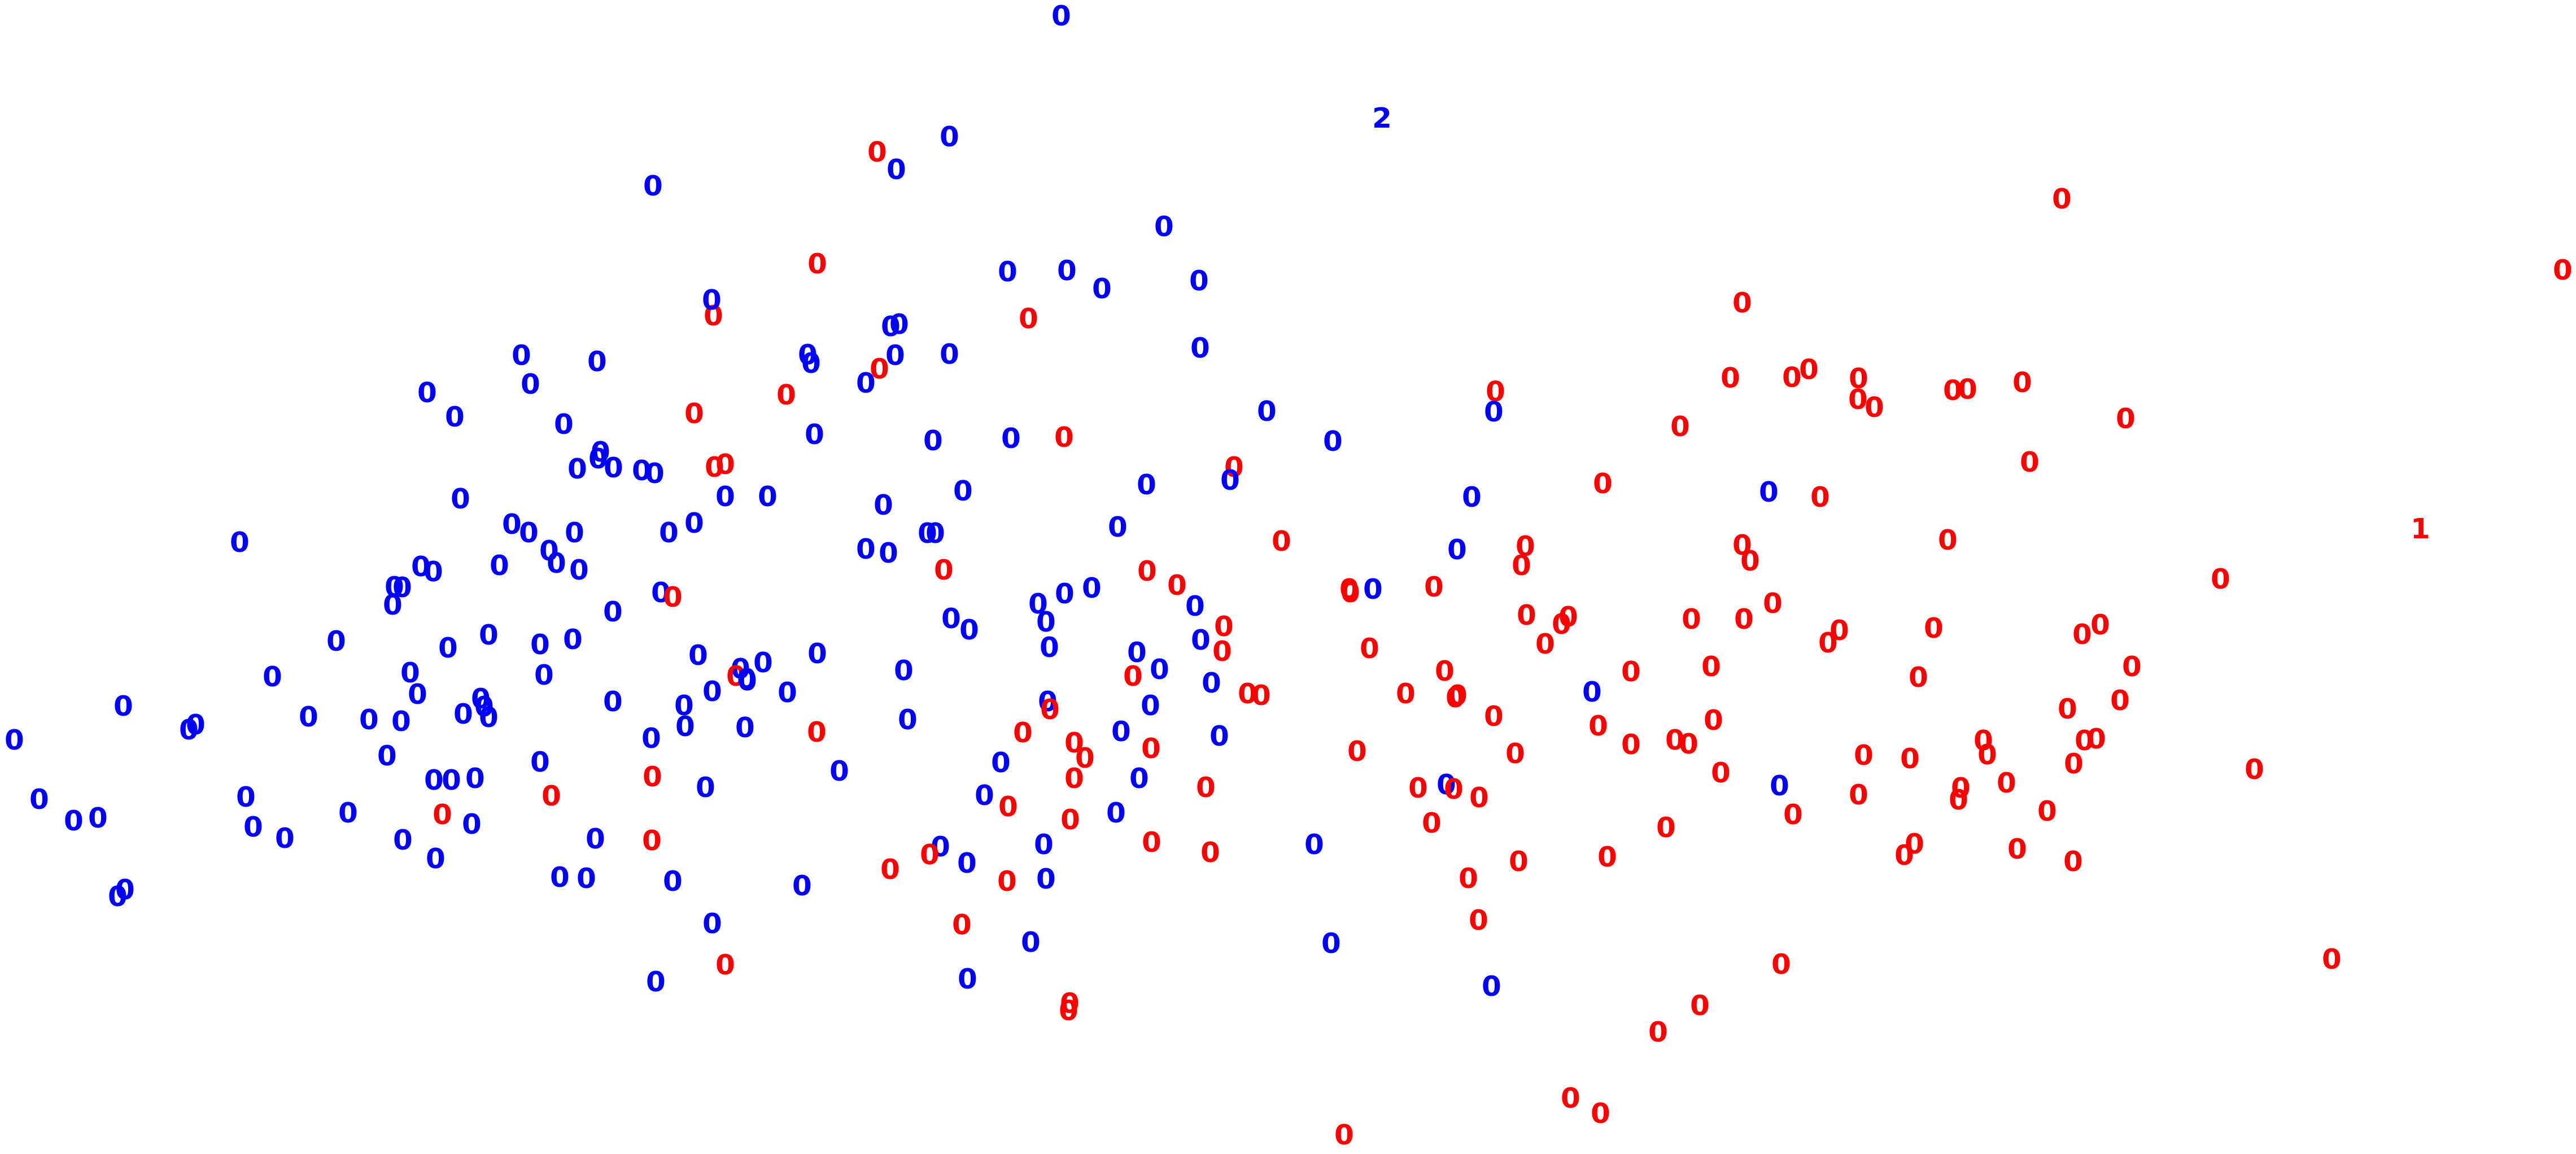

epsilon(e): 4.5 	Number clusters: 1


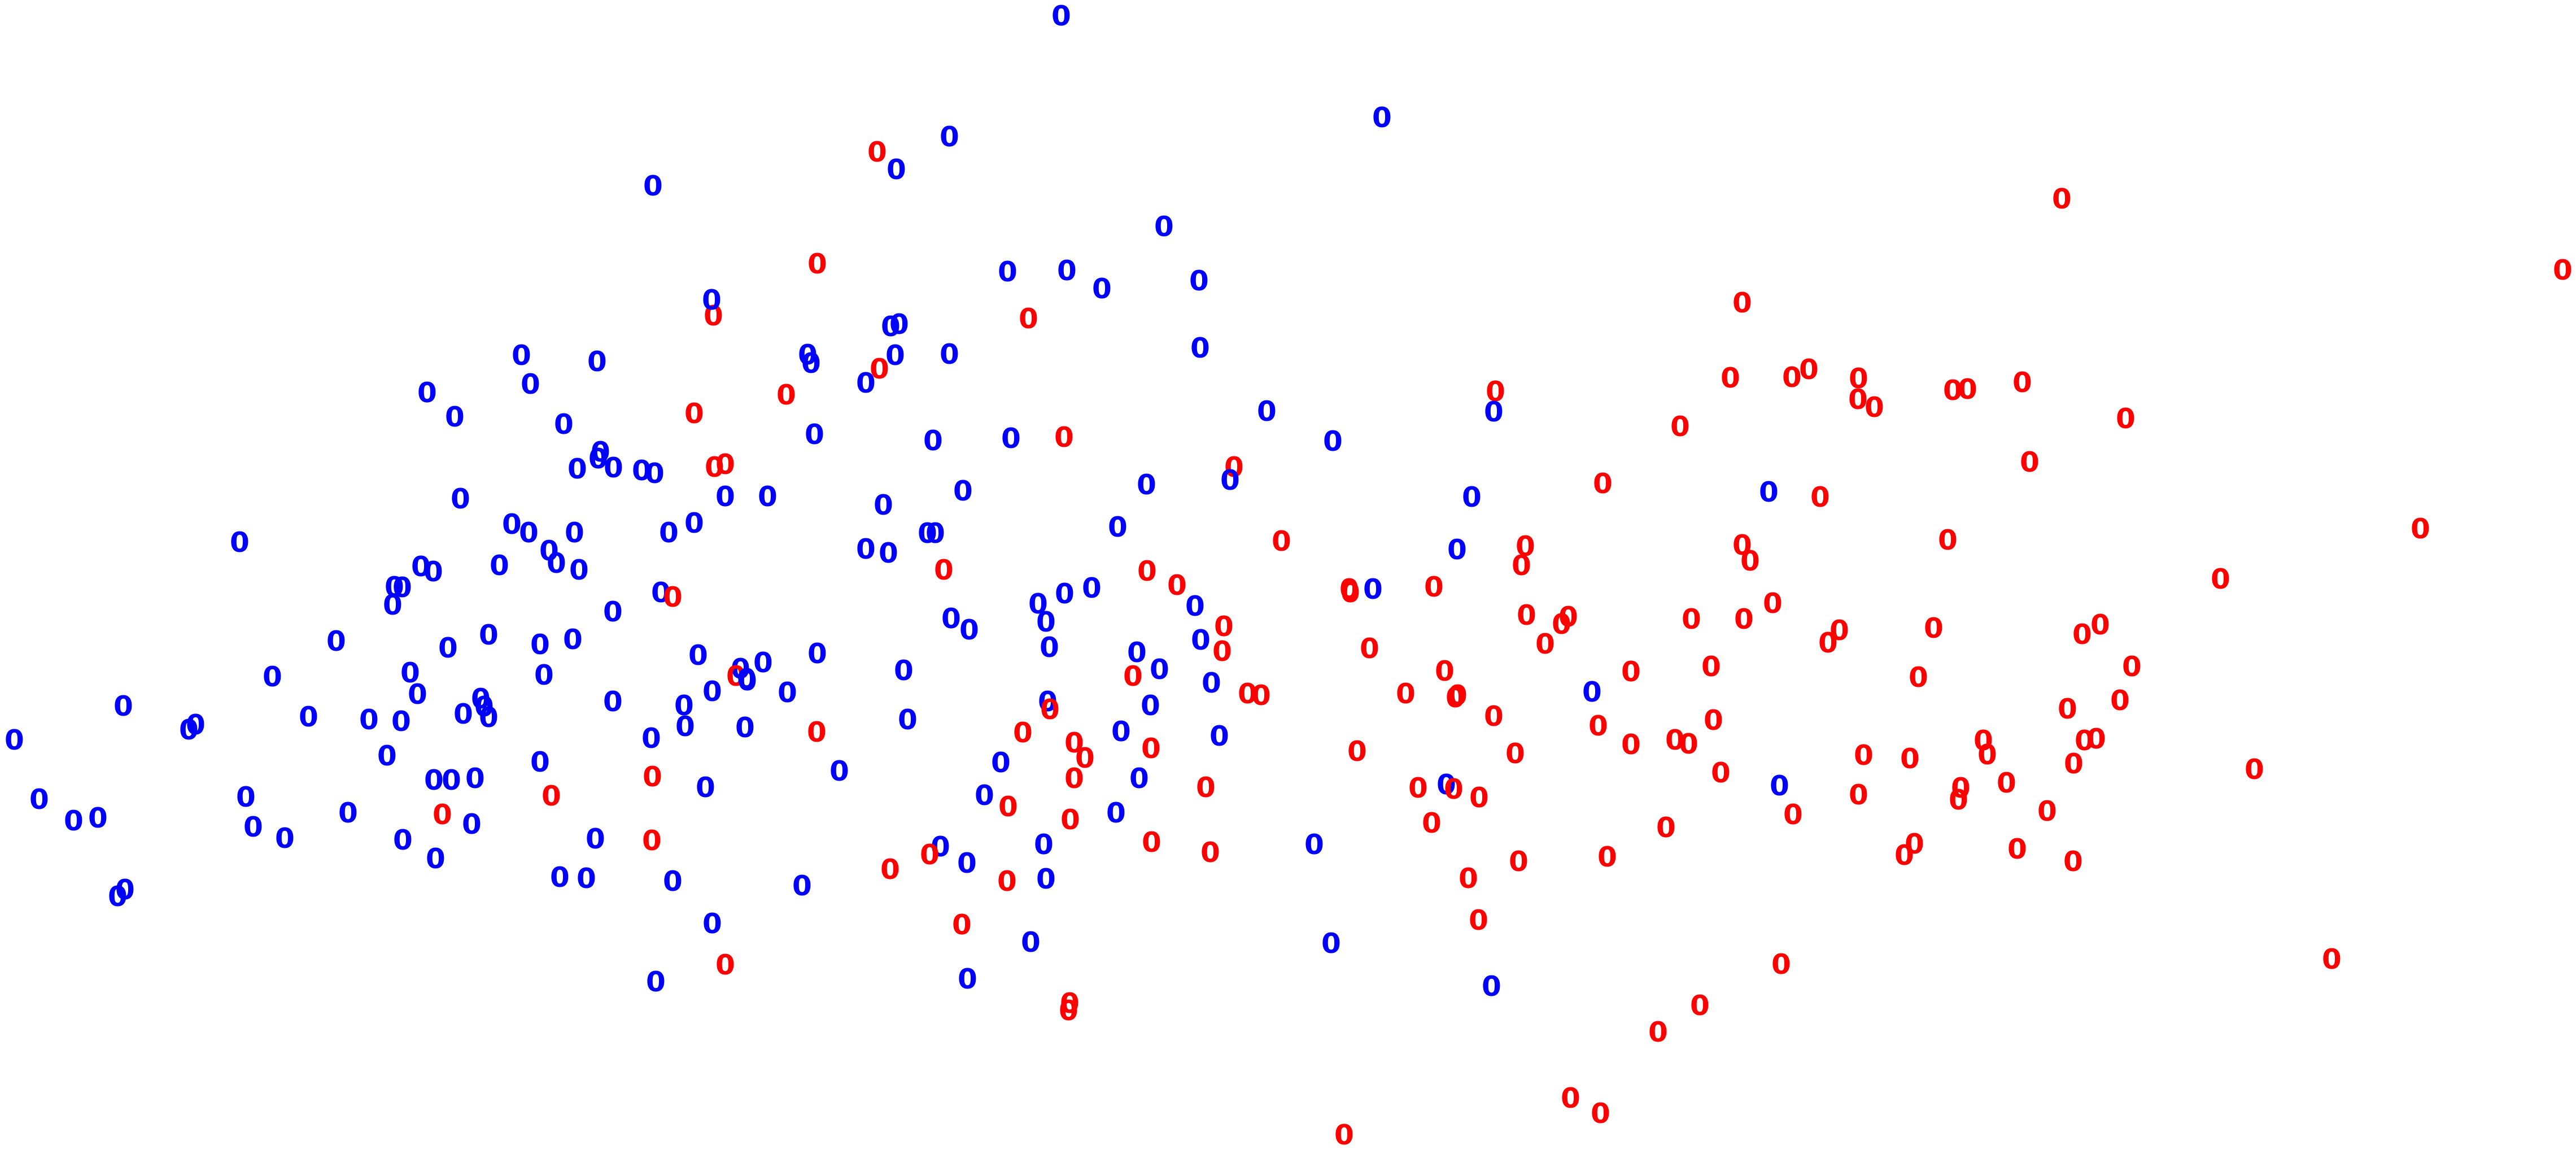

epsilon(e): 5 	Number clusters: 1


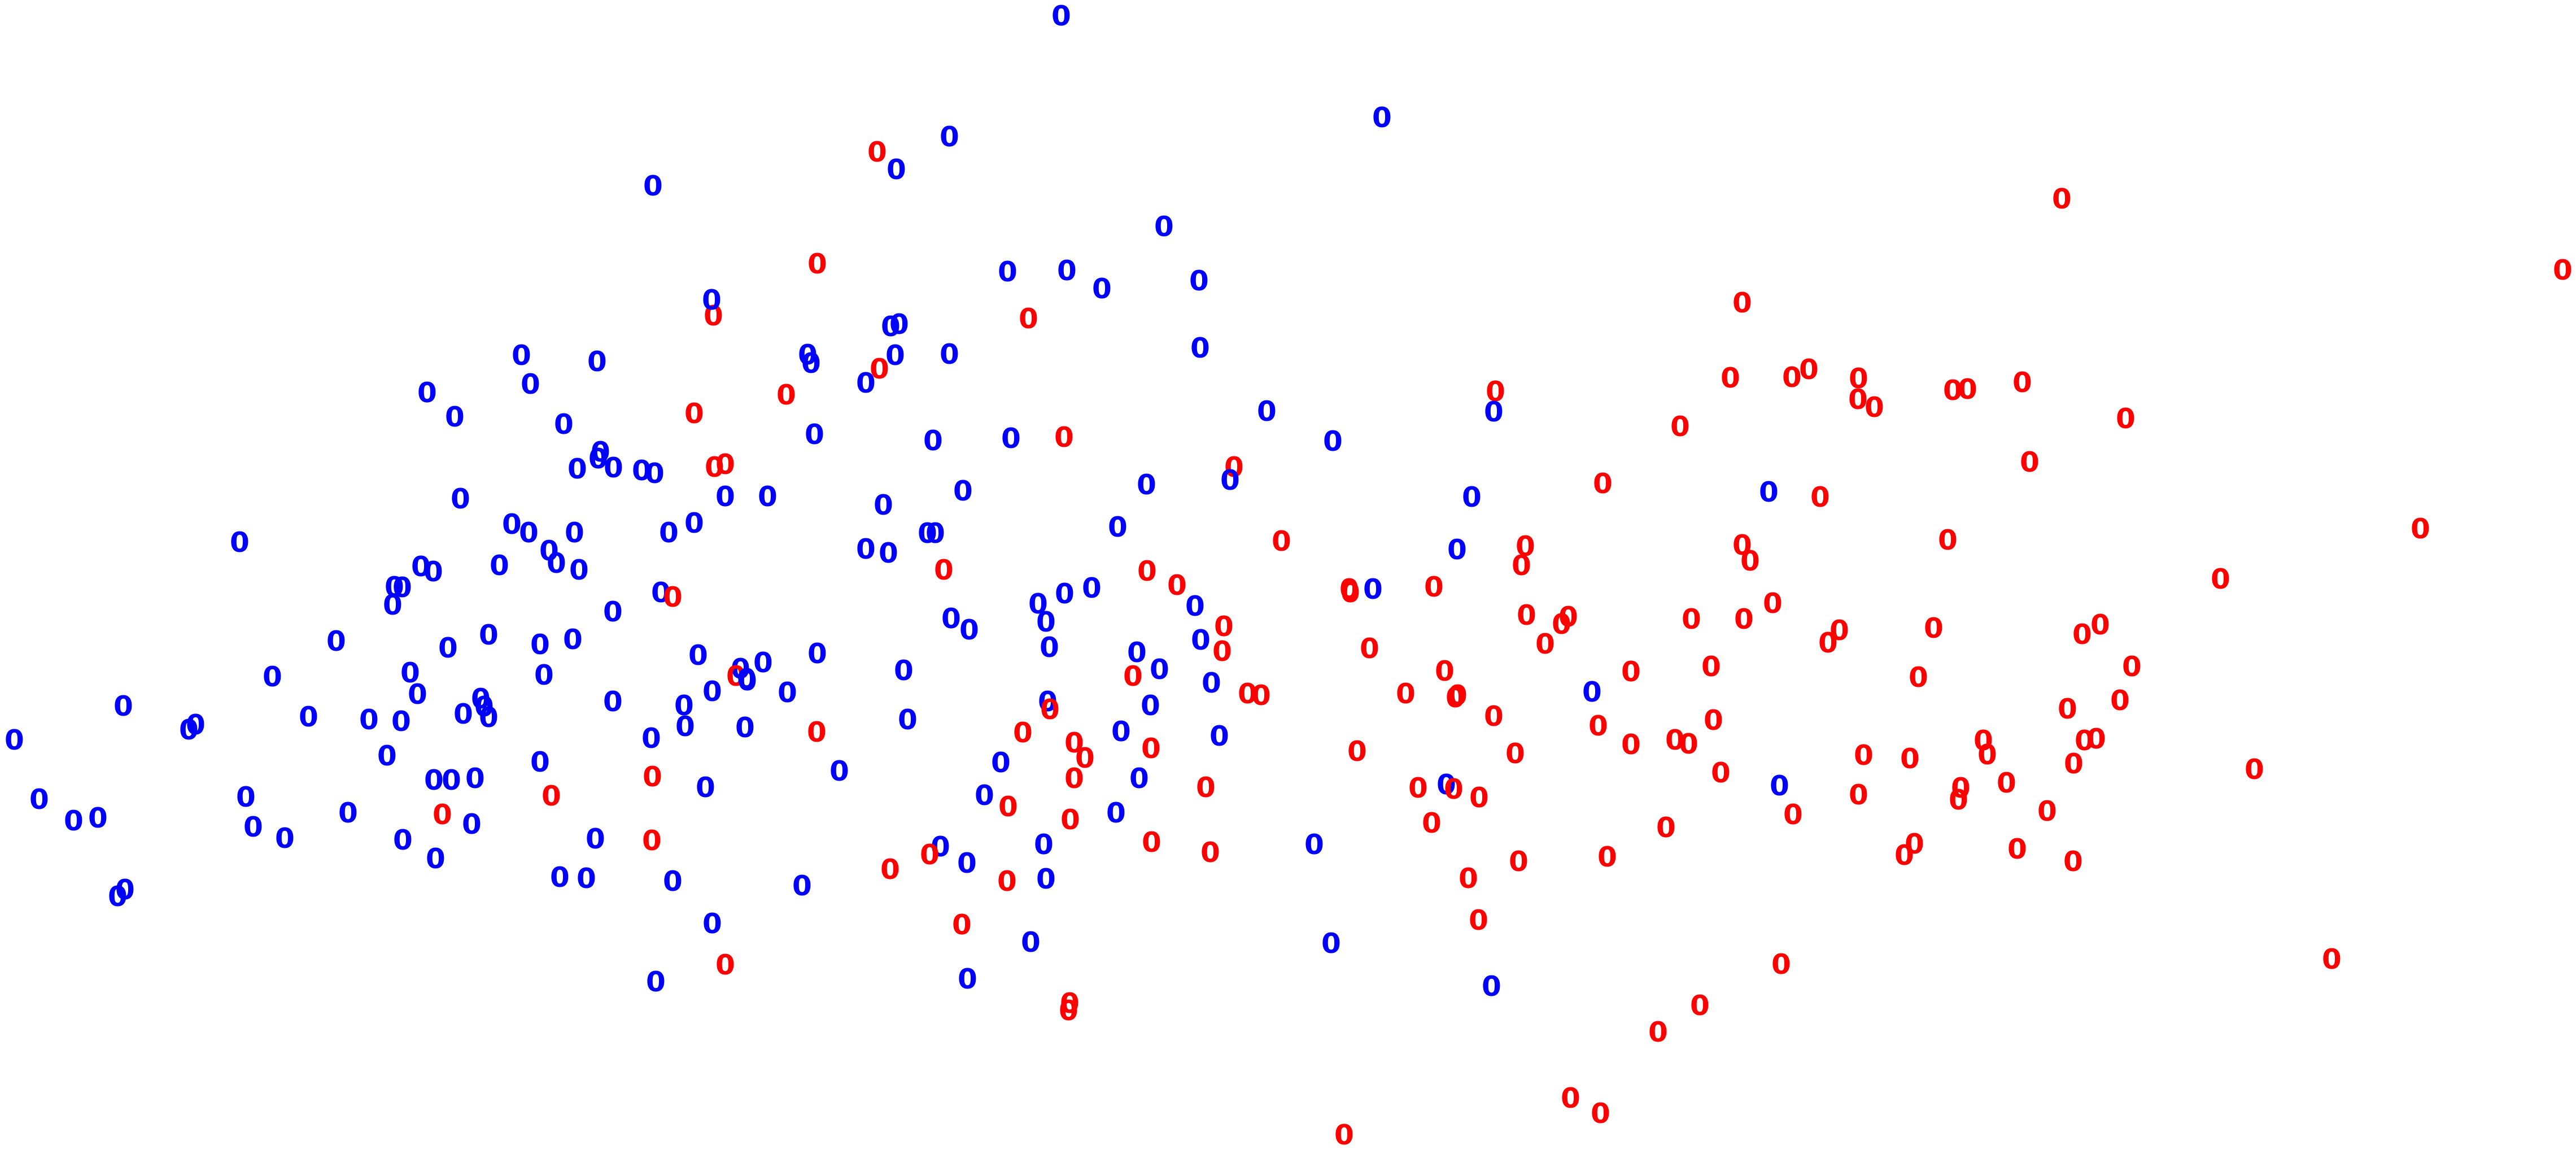

In [ ]:
for e in (0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5):
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=e, min_samples=1)

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)

    print("epsilon(e):", e, "\tNumber clusters:",len(np.unique(clusters)))
    visualize(clusters)

###Finally some adjustments in clustering.  The number of clusters decreased as min_samples increased.